# Testes comparativos: GPU vs CPU

<p>O presente projeto busca realizar comparações de desempenho de processamento em CPU vs GPU para a tarefa de extração de embeddings faciais.</p>


In [16]:
# Import das bibliotecas
import pandas as pd
import numpy as np
import timeit
from functools import partial  # Para permitir a passagem de parametros dentro de timeit
import os
from PIL import Image
from deepface import DeepFace
import matplotlib.pyplot as plt
# import cudf #nao utilizado, embora disponível.

### Configurações Básicas

In [36]:
# configurações básicas
PROCESSING_UNIT = 'GPU' # alterar para CPU apenas quando estiver em ambiente de processamento em CPU
IMAGES_PATH = './imagens/'      # Local das imagens
REPORT_PATH = './relatorios/'   # Local dos relatorios
N_LINES = 100                  # Qtd de imagens

# Define os modelos
model_list = ['Dlib', 'Facenet512', 'Facenet', 'ArcFace', 'OpenFace', 'DeepID', 'DeepFace', 'GhostFaceNet', 'sFace'] # Face Embeddings Models
detector_list = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface','yolov8','yunet', 'fastmtcnn'] # Face Detection Models

### Avaliação do dataset GPU

In [37]:
df_gpu = pd.read_csv(REPORT_PATH + 'GPU_all_models_100.csv', sep=';')


for index, row in df_gpu.iterrows():
    file_path = row['relative_path']  # Adjust as needed
    file_size = os.path.getsize(file_path.replace('\\', '/'))
    df_gpu.loc[index, 'image_size'] = file_size
    
    # Image Resolution
    with Image.open(file_path) as img:
        width, height = img.size
        df_gpu.loc[index, 'image_width'] = width
        df_gpu.loc[index, 'image_height'] = height

df_gpu.to_csv(REPORT_PATH+'GPU'+'_all_models'+'_'+str(N_LINES)+'_IMG_DETAILS.csv', sep=';')    
df_gpu.head()


Unnamed: 0          filename  \
0           0  001_fe3347c0.jpg   
1           1  002_8f8da10e.jpg   
2           2  003_57612506.jpg   
3           3  004_f61e7d0c.jpg   
4           4  005_582c121a.jpg   

                                       relative_path  GPU_opencv_Dlib  \
0  imagens/Celebrity Faces Dataset/Angelina Jolie...              NaN   
1  imagens/Celebrity Faces Dataset/Angelina Jolie...              NaN   
2  imagens/Celebrity Faces Dataset/Angelina Jolie...              NaN   
3  imagens/Celebrity Faces Dataset/Angelina Jolie...              NaN   
4  imagens/Celebrity Faces Dataset/Angelina Jolie...              NaN   

   GPU_opencv_Facenet512  GPU_opencv_Facenet  GPU_opencv_ArcFace  \
0               3.800214            2.022917            2.725315   
1               0.256217            0.246041            0.181368   
2               0.245230            0.234001            0.159798   
3               0.191682            0.158094            0.086241   
4               0.451361            0.235484            0.139934   

   GPU_opencv_OpenFace  GPU_opencv_DeepID  GPU_opencv_DeepFace  ...  \
0             2.705262           0.691771                  NaN  ...   
1             0.155463           0.097042                  NaN  ...   
2             0.155188           0.105276                  NaN  ...   
3             0.085041           0.040592                  NaN  ...   
4             0.136421           0.084415                  NaN  ...   

   GPU_fastmtcnn_Facenet  GPU_fastmtcnn_ArcFace  GPU_fastmtcnn_OpenFace  \
0                    NaN                    NaN                     NaN   
1                    NaN                    NaN                     NaN   
2                    NaN                    NaN                     NaN   
3                    NaN                    NaN                     NaN   
4                    NaN                    NaN                     NaN   

   GPU_fastmtcnn_DeepID  GPU_fastmtcnn_DeepFace  GPU_fastmtcnn_GhostFaceNet  \
0                   NaN                     NaN                         NaN   
1                   NaN                     NaN                         NaN   
2                   NaN                     NaN                         NaN   
3                   NaN                     NaN                         NaN   
4                   NaN                     NaN                         NaN   

   GPU_fastmtcnn_sFace  image_size  image_width  image_height  
0                  NaN     36023.0        474.0         569.0  
1                  NaN     38793.0        474.0         474.0  
2                  NaN     33755.0        474.0         568.0  
3                  NaN      5675.0        160.0         198.0  
4                  NaN     35651.0        474.0         512.0  

[5 rows x 78 columns]

In [38]:
df_gpu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   100 non-null    int64  
 1   filename                     100 non-null    object 
 2   relative_path                100 non-null    object 
 3   GPU_opencv_Dlib              0 non-null      float64
 4   GPU_opencv_Facenet512        98 non-null     float64
 5   GPU_opencv_Facenet           98 non-null     float64
 6   GPU_opencv_ArcFace           98 non-null     float64
 7   GPU_opencv_OpenFace          98 non-null     float64
 8   GPU_opencv_DeepID            98 non-null     float64
 9   GPU_opencv_DeepFace          0 non-null      float64
 10  GPU_opencv_GhostFaceNet      98 non-null     float64
 11  GPU_opencv_sFace             0 non-null      float64
 12  GPU_ssd_Dlib                 0 non-null      float64
 13  GPU_ssd_Facenet512   

In [39]:
# Total de faces detectadas por cada modelo

df_gpu_desc = df_gpu.describe()

df_gpu_desc



Unnamed: 0  GPU_opencv_Dlib  GPU_opencv_Facenet512  GPU_opencv_Facenet  \
count  100.000000              0.0              98.000000           98.000000   
mean    49.500000              NaN               0.294611            0.265399   
std     29.011492              NaN               0.363513            0.189084   
min      0.000000              NaN               0.167438            0.155938   
25%     24.750000              NaN               0.222056            0.214632   
50%     49.500000              NaN               0.242969            0.237150   
75%     74.250000              NaN               0.262208            0.254231   
max     99.000000              NaN               3.800214            2.022917   

       GPU_opencv_ArcFace  GPU_opencv_OpenFace  GPU_opencv_DeepID  \
count           98.000000            98.000000          98.000000   
mean             0.186088             0.171600           0.096968   
std              0.262160             0.260980           0.064823   
min              0.086241             0.077164           0.034155   
25%              0.140086             0.125819           0.078985   
50%              0.154186             0.143546           0.093382   
75%              0.177248             0.157190           0.107430   
max              2.725315             2.705262           0.691771   

       GPU_opencv_DeepFace  GPU_opencv_GhostFaceNet  GPU_opencv_sFace  ...  \
count                  0.0                98.000000               0.0  ...   
mean                   NaN                 0.247606               NaN  ...   
std                    NaN                 0.315797               NaN  ...   
min                    NaN                 0.134875               NaN  ...   
25%                    NaN                 0.189194               NaN  ...   
50%                    NaN                 0.208029               NaN  ...   
75%                    NaN                 0.223598               NaN  ...   
max                    NaN                 3.298535               NaN  ...   

       GPU_fastmtcnn_Facenet  GPU_fastmtcnn_ArcFace  GPU_fastmtcnn_OpenFace  \
count                    0.0                    0.0                     0.0   
mean                     NaN                    NaN                     NaN   
std                      NaN                    NaN                     NaN   
min                      NaN                    NaN                     NaN   
25%                      NaN                    NaN                     NaN   
50%                      NaN                    NaN                     NaN   
75%                      NaN                    NaN                     NaN   
max                      NaN                    NaN                     NaN   

       GPU_fastmtcnn_DeepID  GPU_fastmtcnn_DeepFace  \
count                   0.0                     0.0   
mean                    NaN                     NaN   
std                     NaN                     NaN   
min                     NaN                     NaN   
25%                     NaN                     NaN   
50%                     NaN                     NaN   
75%                     NaN                     NaN   
max                     NaN                     NaN   

       GPU_fastmtcnn_GhostFaceNet  GPU_fastmtcnn_sFace    image_size  \
count                         0.0                  0.0    100.000000   
mean                          NaN                  NaN  30810.140000   
std                           NaN                  NaN  11593.650212   
min                           NaN                  NaN   4777.000000   
25%                           NaN                  NaN  25313.750000   
50%                           NaN                  NaN  32208.000000   
75%                           NaN                  NaN  37933.250000   
max                           NaN                  NaN  67523.000000   

       image_width  image_height  
count   100.000000    100.000000  
mean    445.740000    509

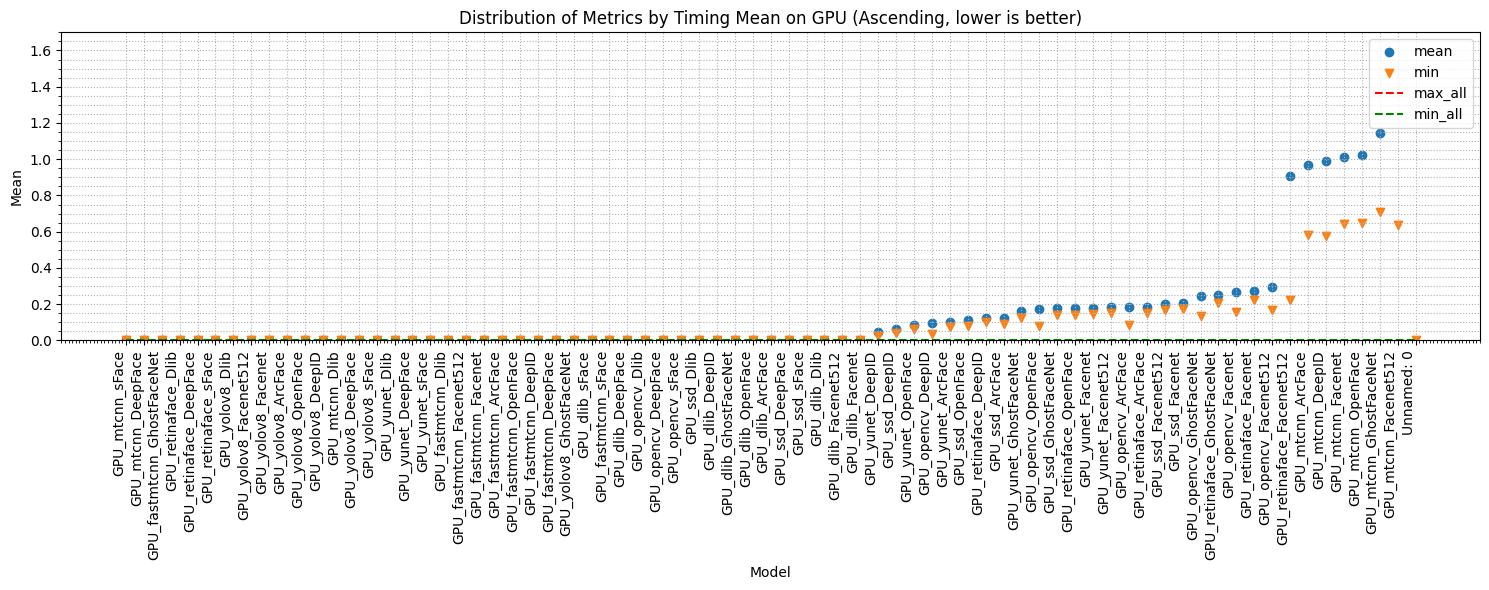

In [40]:
# Grafico das médias de desempenho de cada modelo em GPU

# Drop columns before sorting
columns_to_drop = [col for col in df_gpu_desc.columns if (col.startswith('image') or col == 'GPU_id')]
df_gpu_desc = df_gpu_desc.drop(columns_to_drop, axis=1)

# Ensure "count" is a column (transpose if necessary)
if 'count' in df_gpu_desc.index:
    df_gpu_desc_t = df_gpu_desc.transpose().fillna(0)
    df_gpu_desc_t.index.name = 'metric'  # Optional: Rename index


# Sort by "count" in descending order
df_gpu_desc_t = df_gpu_desc_t.sort_values(by=['mean'], ascending=True)

# Get relevant data for plotting
metrics = df_gpu_desc_t.index.to_list()
means = df_gpu_desc_t['mean'].to_list()
maxs = df_gpu_desc_t['max'].to_list()
mins = df_gpu_desc_t['min'].to_list()


# Create the bar chart
plt.figure(figsize=(15, 6))  # Adjust figure size as needed
plt.scatter(metrics, means, label='mean')
plt.scatter(metrics, mins, marker='v', label='min')

plt.hlines(y=max(means), xmin=0, xmax=len(metrics)-1, colors='red', linestyle='dashed', label='max_all')
plt.hlines(y=min(means), xmin=0, xmax=len(metrics)-1, colors='green', linestyle='dashed', label='min_all')

plt.ylim(ymax=1.7, ymin=0)

# Customize appearance
plt.xlabel('Model')
plt.ylabel('Mean')
plt.title('Distribution of Metrics by Timing Mean on GPU (Ascending, lower is better)')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping

plt.grid(which='major', axis='both', linestyle='dotted')   
plt.grid(which='minor', axis='y', linestyle='dotted') 
plt.minorticks_on()

plt.legend()
    
plt.show()

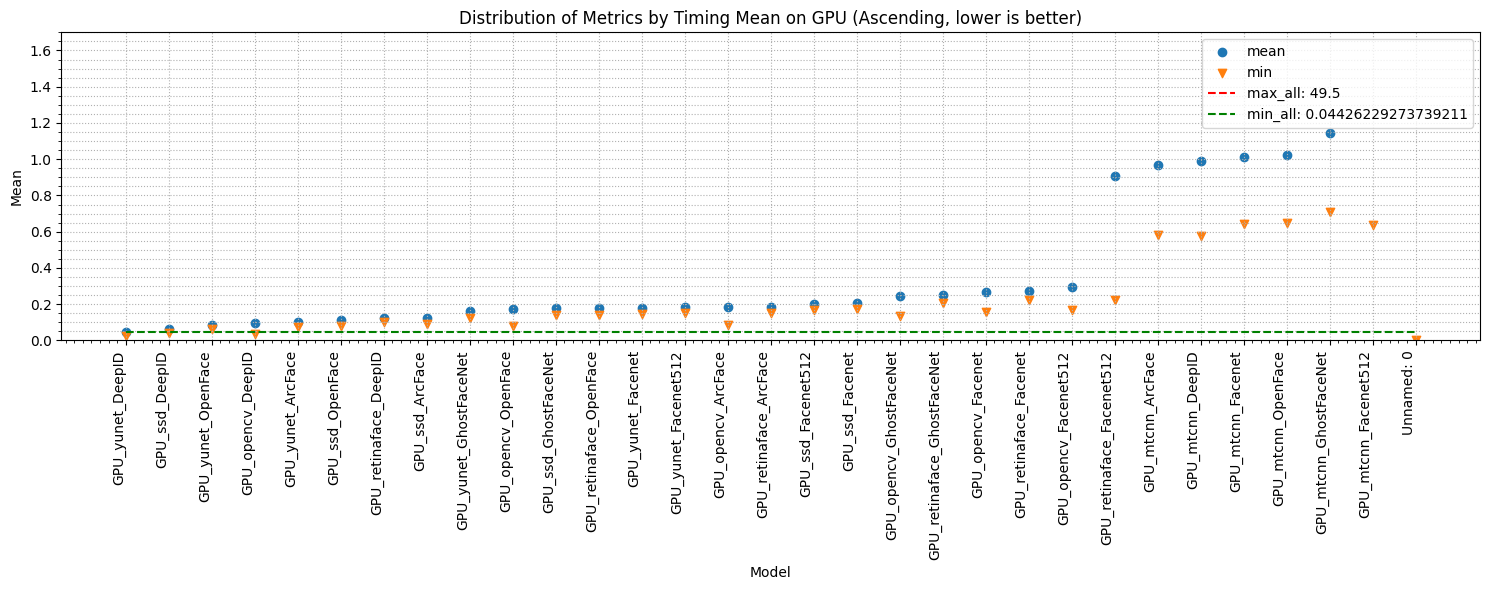

In [41]:
# Grafico das médias de desempenho de cada modelo em GPU, somente com os dados válidos

# Drop columns before sorting
columns_to_drop = [col for col in df_gpu_desc.columns if (col.startswith('image') or col == 'GPU_id')]
df_gpu_desc = df_gpu_desc.drop(columns_to_drop, axis=1)

# Ensure "count" is a column (transpose if necessary)
if 'count' in df_gpu_desc.index:
    df_gpu_desc_t = df_gpu_desc.transpose().dropna()
    df_gpu_desc_t.index.name = 'metric'  # Optional: Rename index


# Sort by "count" in descending order
df_gpu_desc_t = df_gpu_desc_t.sort_values(by=['mean'], ascending=True)

# Get relevant data for plotting
metrics = df_gpu_desc_t.index.to_list()
means = df_gpu_desc_t['mean'].to_list()
maxs = df_gpu_desc_t['max'].to_list()
mins = df_gpu_desc_t['min'].to_list()


# Create the bar chart
plt.figure(figsize=(15, 6))  # Adjust figure size as needed
plt.scatter(metrics, means, label='mean')
plt.scatter(metrics, mins, marker='v', label='min')

plt.hlines(y=max(means), xmin=0, xmax=len(metrics)-1, colors='red', linestyle='dashed', label=f'max_all: {max(means)}')
plt.hlines(y=min(means), xmin=0, xmax=len(metrics)-1, colors='green', linestyle='dashed', label=f'min_all: {min(means)}')

plt.ylim(ymax=1.7, ymin=0)

# Customize appearance
plt.xlabel('Model')
plt.ylabel('Mean')
plt.title('Distribution of Metrics by Timing Mean on GPU (Ascending, lower is better)')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping

plt.grid(which='major', axis='both', linestyle='dotted')   
plt.grid(which='minor', axis='y', linestyle='dotted') 
plt.minorticks_on()

plt.legend()

    
plt.show()

In [42]:
# GRAVA O df_gpu.describe() em CSV

df_gpu_desc.to_csv(REPORT_PATH + 'GPU_details.csv', sep=';')

In [43]:
# DEFINE GRUPOS DE MODELOS

gpu_model_groups = {
    "opencv": [
        "GPU_opencv_Dlib",  
        "GPU_opencv_Facenet512", 
        "GPU_opencv_Facenet",
        "GPU_opencv_ArcFace", 
        "GPU_opencv_OpenFace", 
        "GPU_opencv_DeepID", 
        "GPU_opencv_DeepFace",  
        "GPU_opencv_GhostFaceNet",  
        "GPU_opencv_sFace" 
    ],
    "ssd": [ 
        "GPU_ssd_Dlib",
        "GPU_ssd_Facenet512",
        "GPU_ssd_Facenet",
        "GPU_ssd_ArcFace",
        "GPU_ssd_OpenFace",
        "GPU_ssd_DeepID",
        "GPU_ssd_DeepFace",
        "GPU_ssd_GhostFaceNet",
        "GPU_ssd_sFace"
    ],
    "dlib": [ 
        "GPU_dlib_Dlib",
        "GPU_dlib_Facenet512",
        "GPU_dlib_Facenet",
        "GPU_dlib_ArcFace",
        "GPU_dlib_OpenFace",
        "GPU_dlib_DeepID",
        "GPU_dlib_DeepFace",
        "GPU_dlib_GhostFaceNet",
        "GPU_dlib_sFace"
    ],
    "mtcnn": [ 
        "GPU_mtcnn_Dlib",
        "GPU_mtcnn_Facenet512",
        "GPU_mtcnn_Facenet",
        "GPU_mtcnn_ArcFace",
        "GPU_mtcnn_OpenFace",
        "GPU_mtcnn_DeepID",
        "GPU_mtcnn_DeepFace",
        "GPU_mtcnn_GhostFaceNet",
        "GPU_mtcnn_sFace"
    ],
    "fastmtcnn": [ 
        "GPU_fastmtcnn_Dlib",
        "GPU_fastmtcnn_Facenet512",
        "GPU_fastmtcnn_Facenet",
        "GPU_fastmtcnn_ArcFace",
        "GPU_fastmtcnn_OpenFace",
        "GPU_fastmtcnn_DeepID",
        "GPU_fastmtcnn_DeepFace",
        "GPU_fastmtcnn_GhostFaceNet",
        "GPU_fastmtcnn_sFace"
    ],
    "retinaface": [ 
        "GPU_retinaface_Dlib",
        "GPU_retinaface_Facenet512",
        "GPU_retinaface_Facenet",
        "GPU_retinaface_ArcFace",
        "GPU_retinaface_OpenFace",
        "GPU_retinaface_DeepID",
        "GPU_retinaface_DeepFace",
        "GPU_retinaface_GhostFaceNet",
        "GPU_retinaface_sFace"
    ],
    "yolov8": [ 
        "GPU_yolov8_Dlib",
        "GPU_yolov8_Facenet512",
        "GPU_yolov8_Facenet",
        "GPU_yolov8_ArcFace",
        "GPU_yolov8_OpenFace",
        "GPU_yolov8_DeepID",
        "GPU_yolov8_DeepFace",
        "GPU_yolov8_GhostFaceNet",
        "GPU_yolov8_sFace"
    ],
    "yunet": [ 
        "GPU_yunet_Dlib",
        "GPU_yunet_Facenet512",
        "GPU_yunet_Facenet",
        "GPU_yunet_ArcFace",
        "GPU_yunet_OpenFace",
        "GPU_yunet_DeepID",
        "GPU_yunet_DeepFace",
        "GPU_yunet_GhostFaceNet",
        "GPU_yunet_sFace"
    ],
}

In [50]:
df_gpu.columns = ['GPU_id', 'filename', 'relative_path', 'GPU_opencv_Dlib',
       'GPU_opencv_Facenet512', 'GPU_opencv_Facenet', 'GPU_opencv_ArcFace',
       'GPU_opencv_OpenFace', 'GPU_opencv_DeepID', 'GPU_opencv_DeepFace',
       'GPU_opencv_GhostFaceNet', 'GPU_opencv_sFace', 'GPU_ssd_Dlib',
       'GPU_ssd_Facenet512', 'GPU_ssd_Facenet', 'GPU_ssd_ArcFace',
       'GPU_ssd_OpenFace', 'GPU_ssd_DeepID', 'GPU_ssd_DeepFace',
       'GPU_ssd_GhostFaceNet', 'GPU_ssd_sFace', 'GPU_dlib_Dlib',
       'GPU_dlib_Facenet512', 'GPU_dlib_Facenet', 'GPU_dlib_ArcFace',
       'GPU_dlib_OpenFace', 'GPU_dlib_DeepID', 'GPU_dlib_DeepFace',
       'GPU_dlib_GhostFaceNet', 'GPU_dlib_sFace', 'GPU_mtcnn_Dlib',
       'GPU_mtcnn_Facenet512', 'GPU_mtcnn_Facenet', 'GPU_mtcnn_ArcFace',
       'GPU_mtcnn_OpenFace', 'GPU_mtcnn_DeepID', 'GPU_mtcnn_DeepFace',
       'GPU_mtcnn_GhostFaceNet', 'GPU_mtcnn_sFace', 'GPU_retinaface_Dlib',
       'GPU_retinaface_Facenet512', 'GPU_retinaface_Facenet',
       'GPU_retinaface_ArcFace', 'GPU_retinaface_OpenFace',
       'GPU_retinaface_DeepID', 'GPU_retinaface_DeepFace',
       'GPU_retinaface_GhostFaceNet', 'GPU_retinaface_sFace',
       'GPU_yolov8_Dlib', 'GPU_yolov8_Facenet512', 'GPU_yolov8_Facenet',
       'GPU_yolov8_ArcFace', 'GPU_yolov8_OpenFace', 'GPU_yolov8_DeepID',
       'GPU_yolov8_DeepFace', 'GPU_yolov8_GhostFaceNet', 'GPU_yolov8_sFace',
       'GPU_yunet_Dlib', 'GPU_yunet_Facenet512', 'GPU_yunet_Facenet',
       'GPU_yunet_ArcFace', 'GPU_yunet_OpenFace', 'GPU_yunet_DeepID',
       'GPU_yunet_DeepFace', 'GPU_yunet_GhostFaceNet', 'GPU_yunet_sFace',
       'GPU_fastmtcnn_Dlib', 'GPU_fastmtcnn_Facenet512',
       'GPU_fastmtcnn_Facenet', 'GPU_fastmtcnn_ArcFace',
       'GPU_fastmtcnn_OpenFace', 'GPU_fastmtcnn_DeepID',
       'GPU_fastmtcnn_DeepFace', 'GPU_fastmtcnn_GhostFaceNet',
       'GPU_fastmtcnn_sFace', 'image_size', 'image_width', 'image_height']

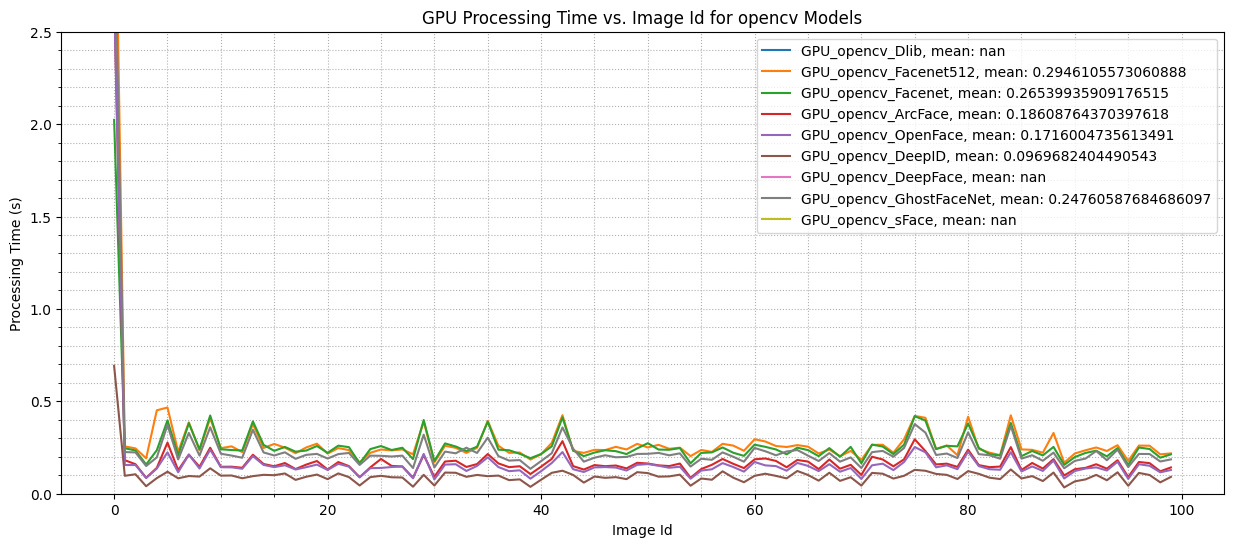

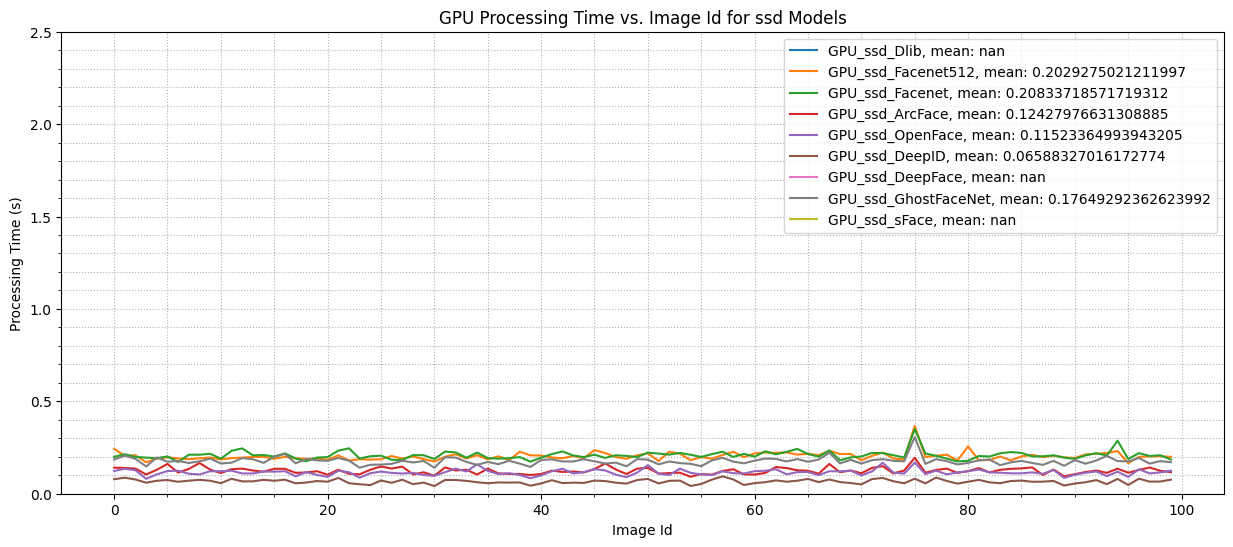

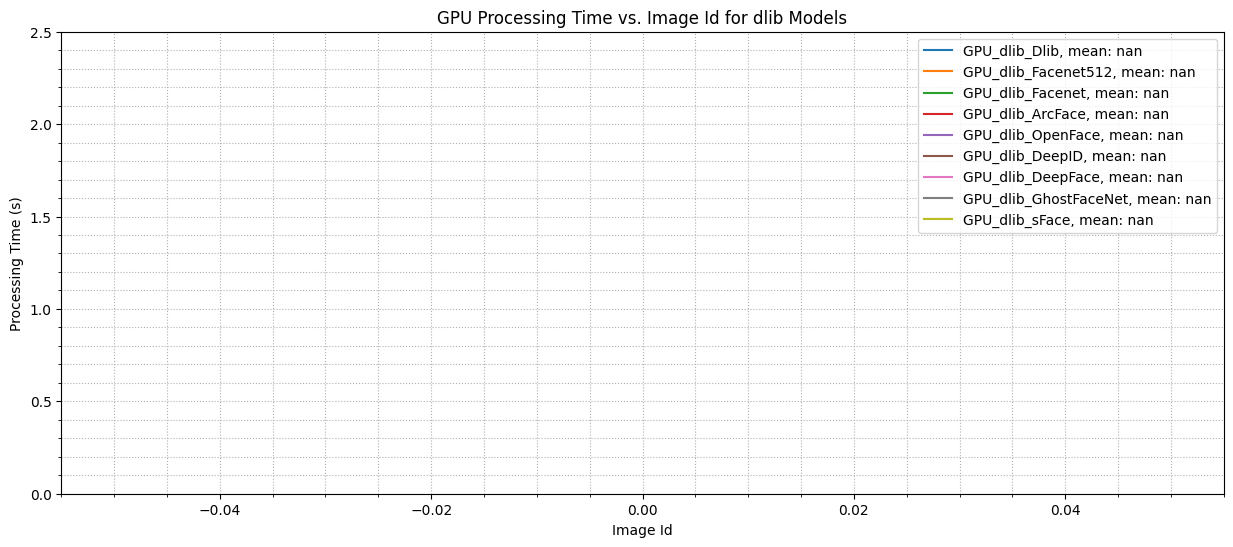

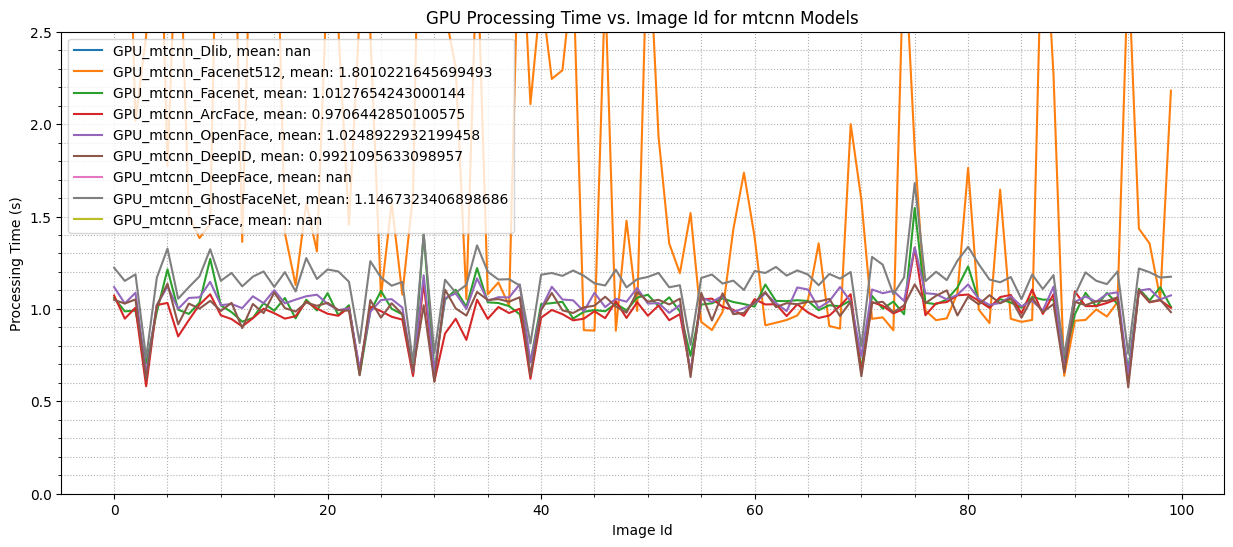

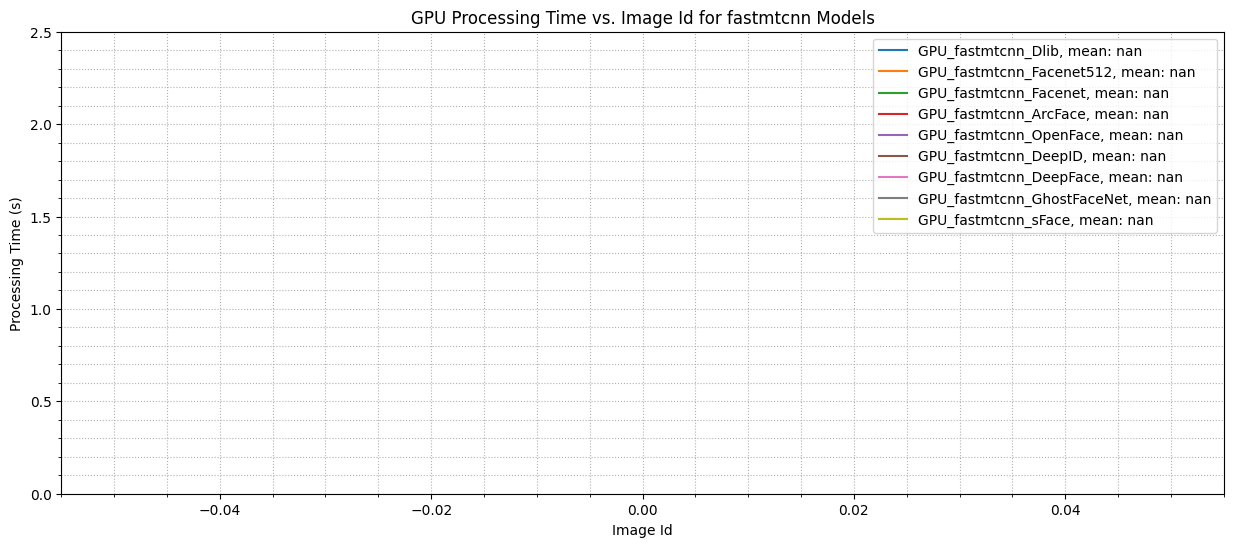

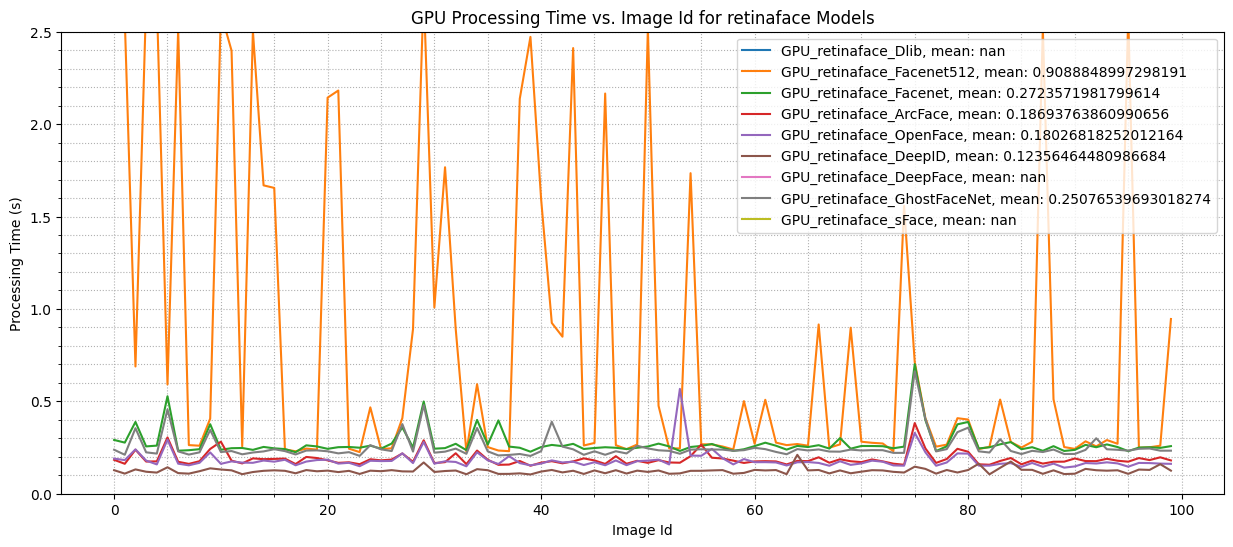

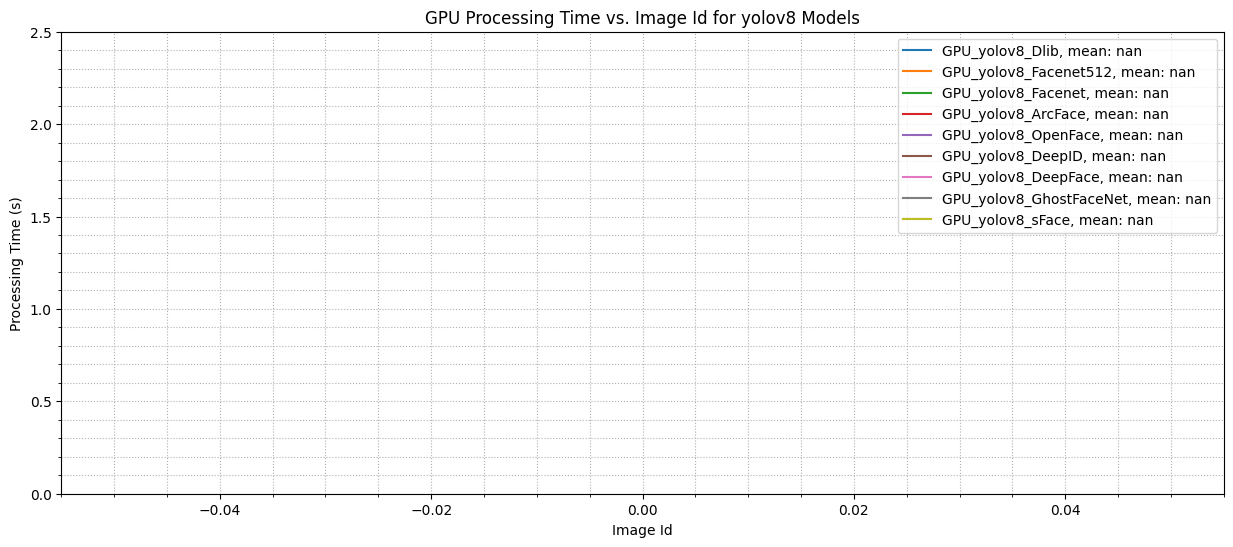

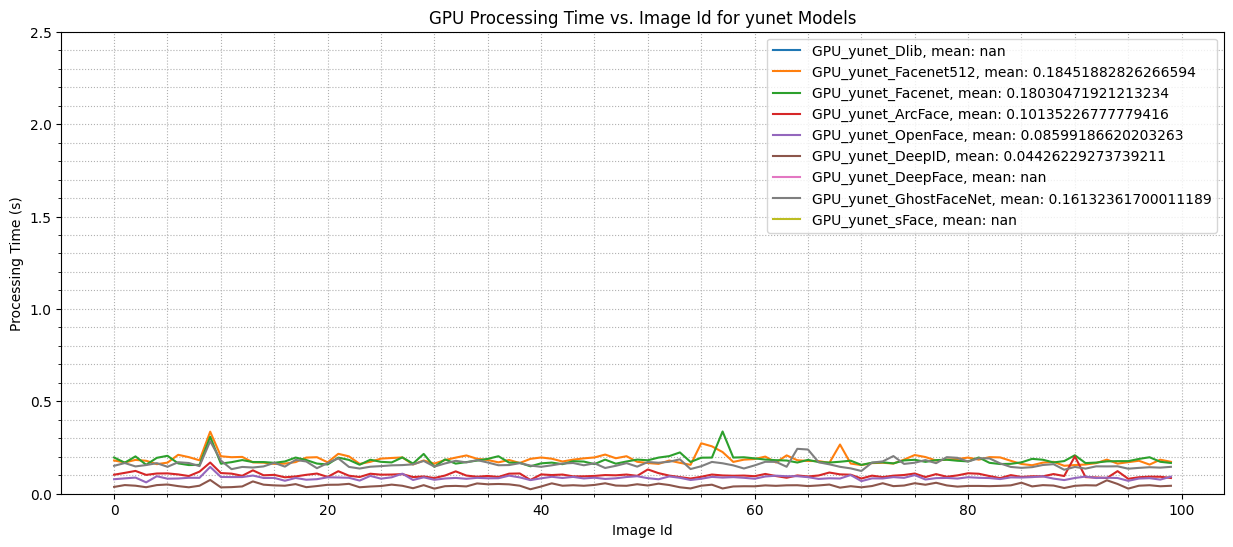

In [51]:
# GRÁFICOS COM O TEMPO DE PROCESSAMENTO DE CADA IMAGEM

for model_group_name, columns in gpu_model_groups.items():
    fig, ax = plt.subplots(figsize=(15, 6))  # Create figure with desired size

    for col in columns:
        ax.plot(df_gpu['GPU_id'], df_gpu[col], label=f'{col}, mean: {np.mean(df_gpu[col])}')  # Plot on the current axis 'ax'

    ax.set_ylim(ymax=2.5, ymin=0)
    ax.set_xlabel('Image Id')  # Set labels for the current axis
    ax.set_ylabel("Processing Time (s)")
    ax.set_title(f"GPU Processing Time vs. Image Id for {model_group_name} Models")
    ax.legend() 

    ax.grid(which='major', axis='both', linestyle='dotted')   
    ax.grid(which='minor', axis='both', linestyle='dotted') 
    ax.minorticks_on()
    
    plt.show()

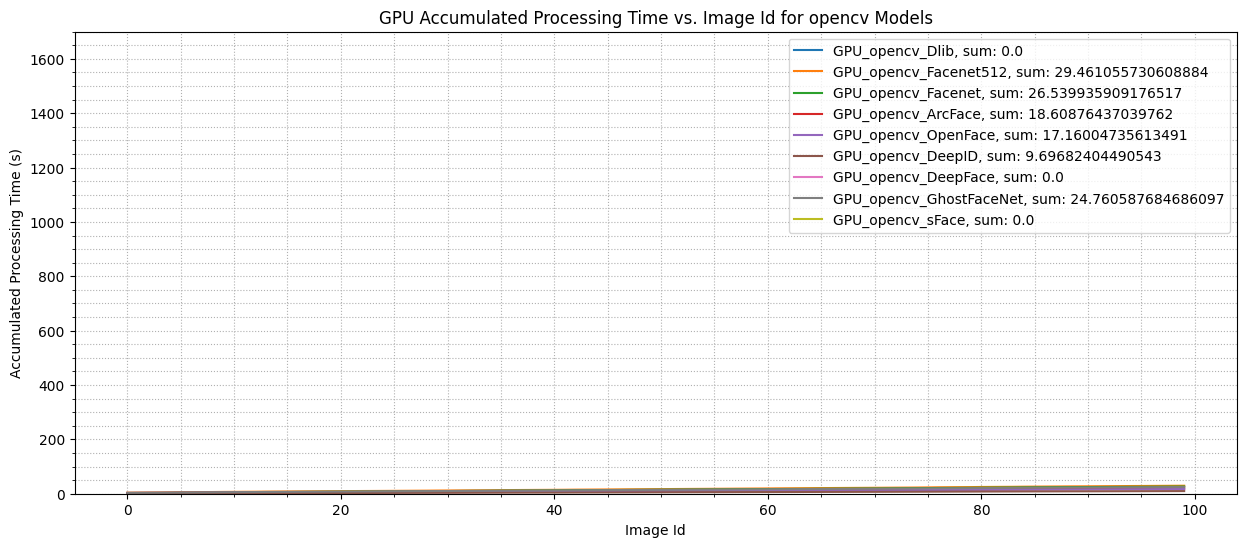

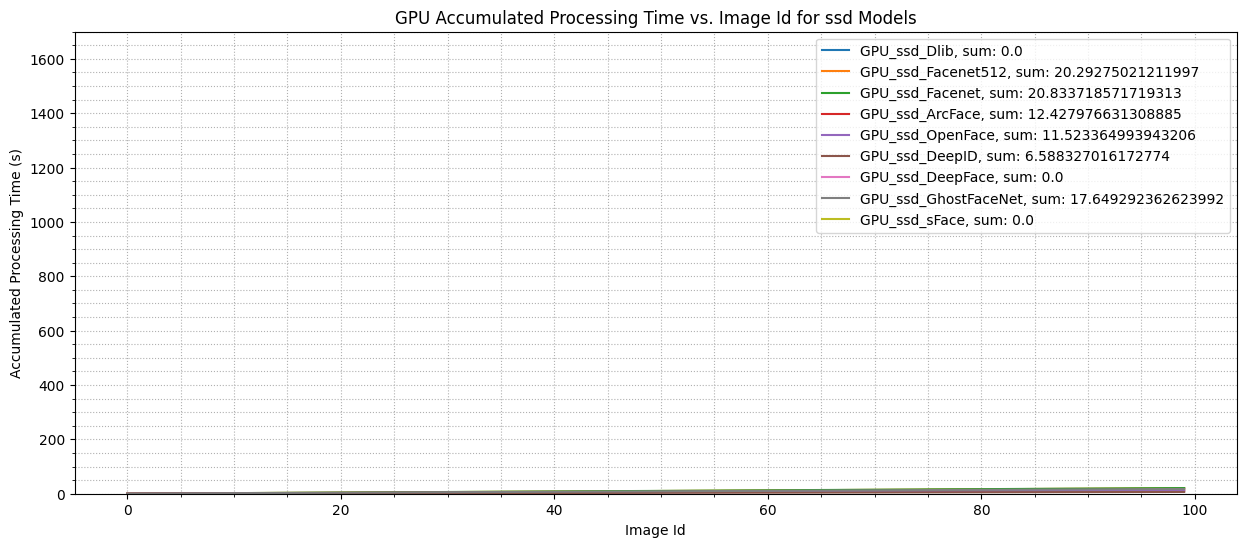

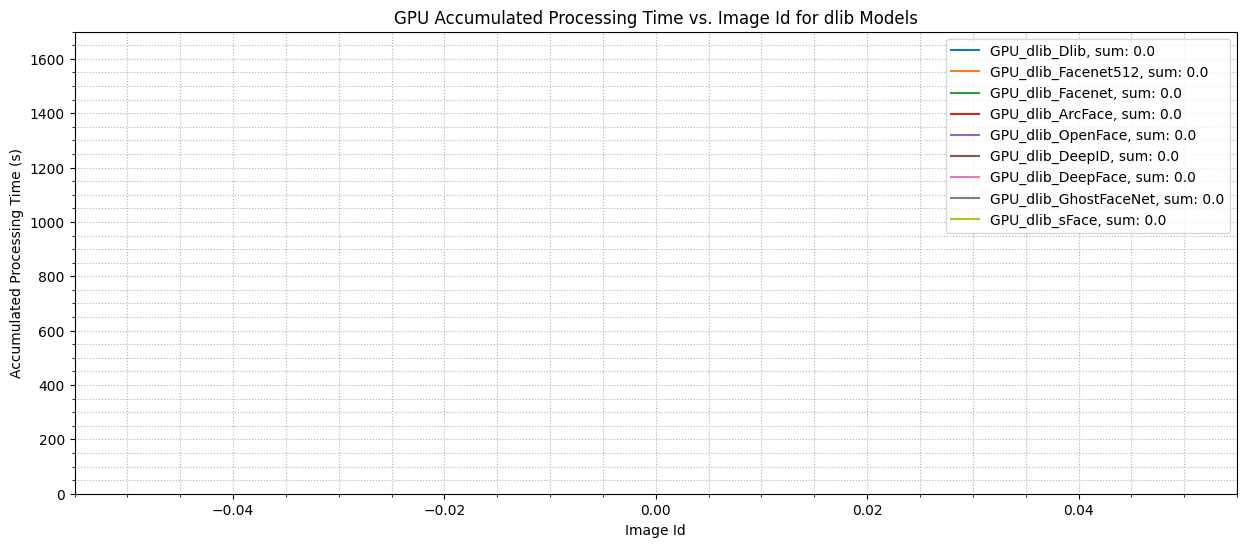

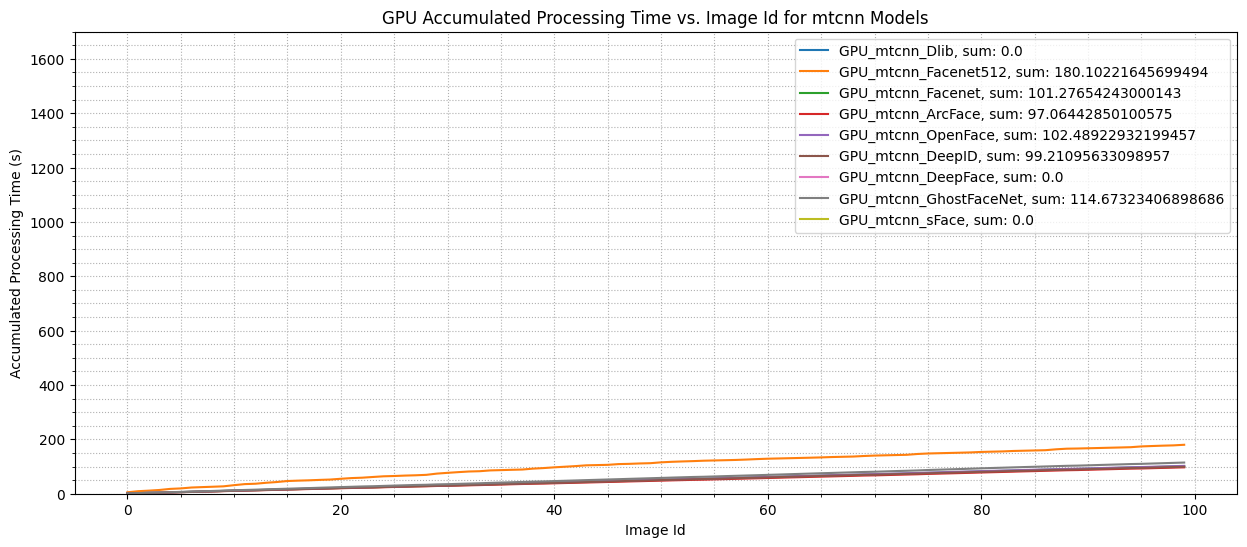

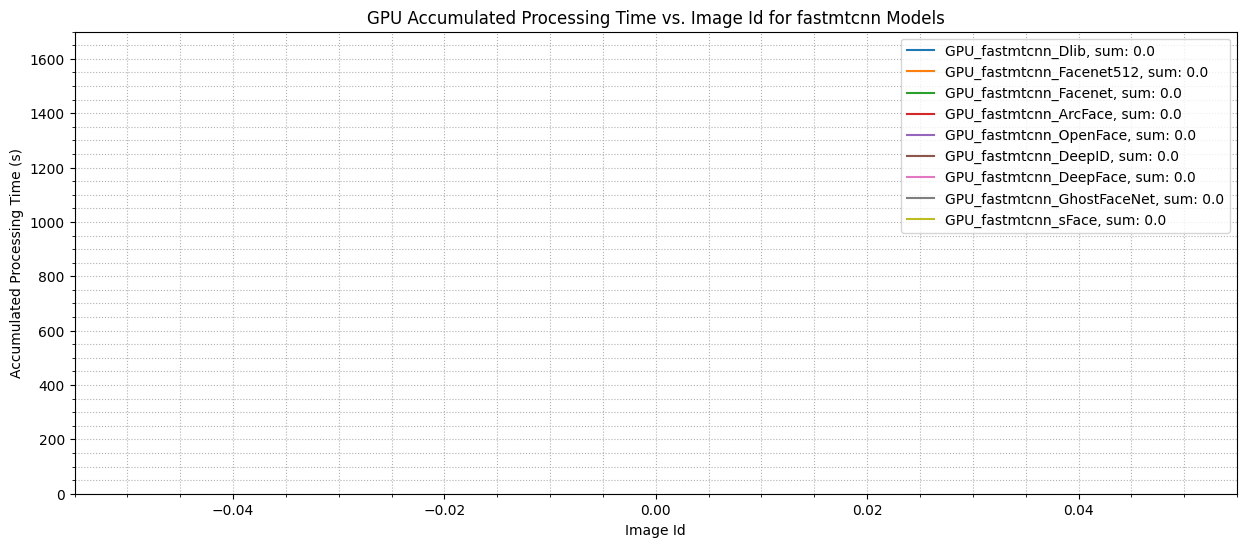

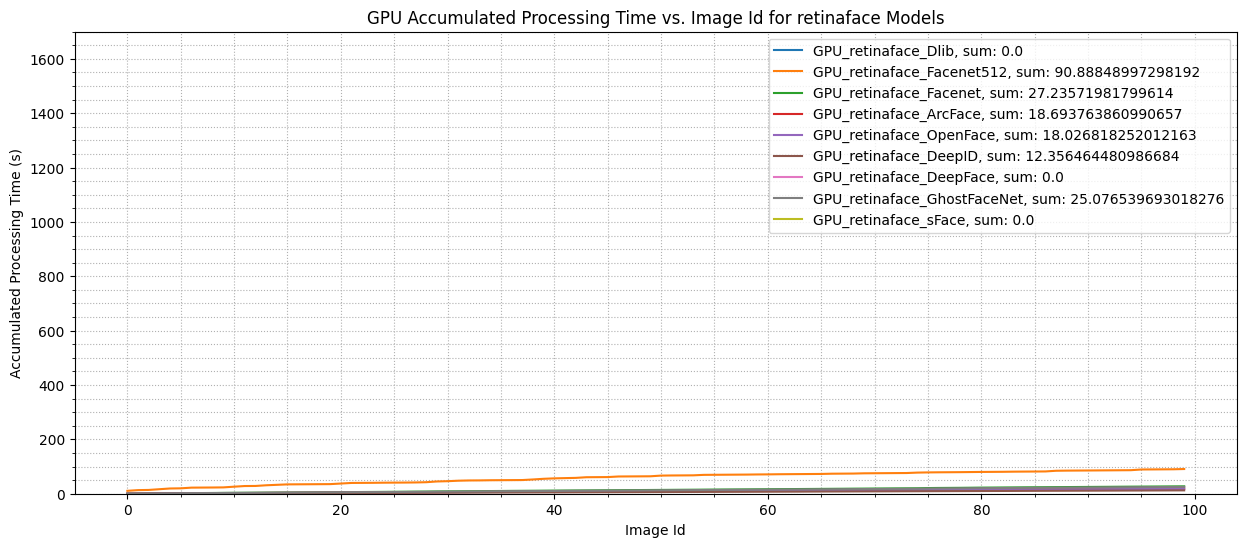

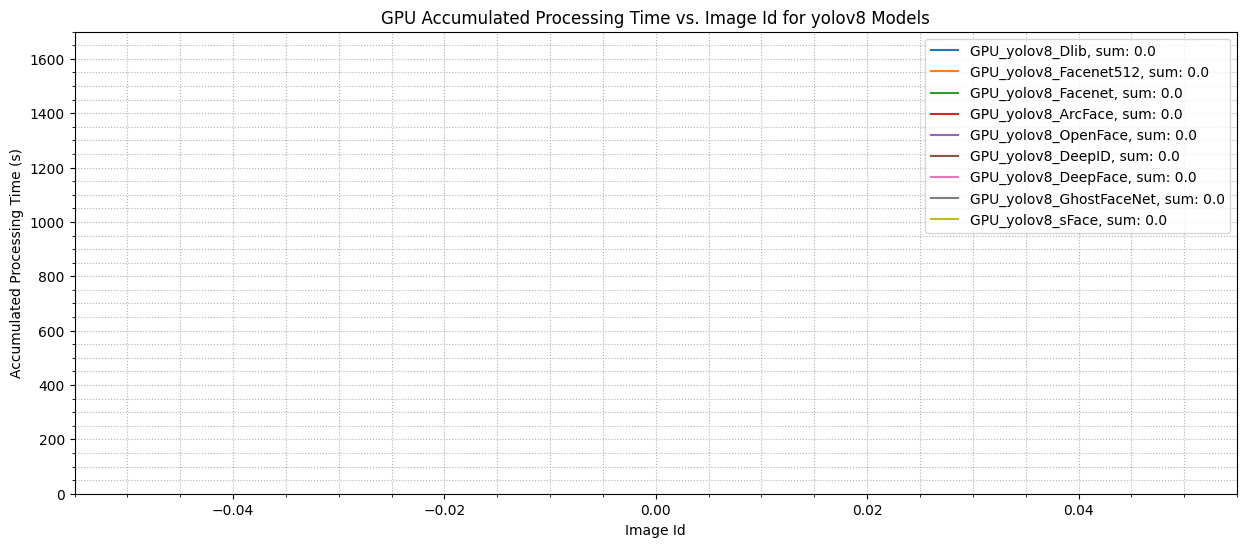

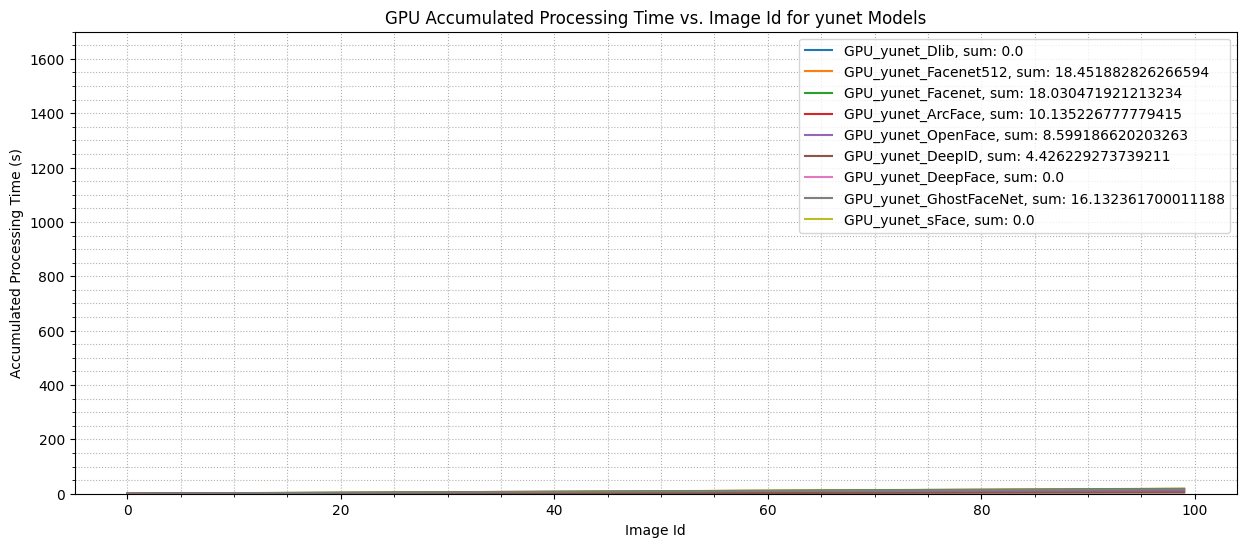

In [52]:
for model_group_name, columns in gpu_model_groups.items():
    fig, ax = plt.subplots(figsize=(15, 6)) 

    for col in columns:
        data = df_gpu[col]
        cumulative_data = data.cumsum() 
        ax.plot(df_gpu['GPU_id'], cumulative_data, label=f'{col}, sum: {np.sum(df_gpu[col])}')

    ax.set_ylim(ymax=1700, ymin=0)  # Adjust ymax as needed
    ax.set_xlabel('Image Id')
    ax.set_ylabel("Accumulated Processing Time (s)")  # Modified label
    ax.set_title(f"GPU Accumulated Processing Time vs. Image Id for {model_group_name} Models")
    ax.legend() 
    
    ax.grid(which='major', axis='both', linestyle='dotted')   
    ax.grid(which='minor', axis='both', linestyle='dotted') 
    ax.minorticks_on()
    
    plt.show()

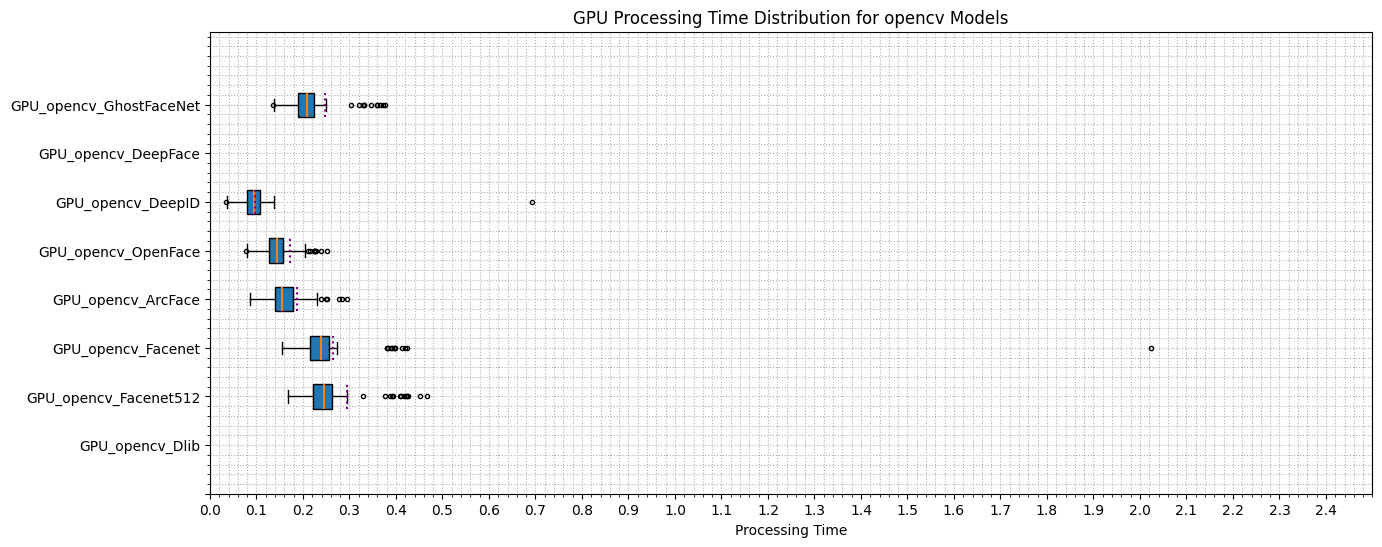

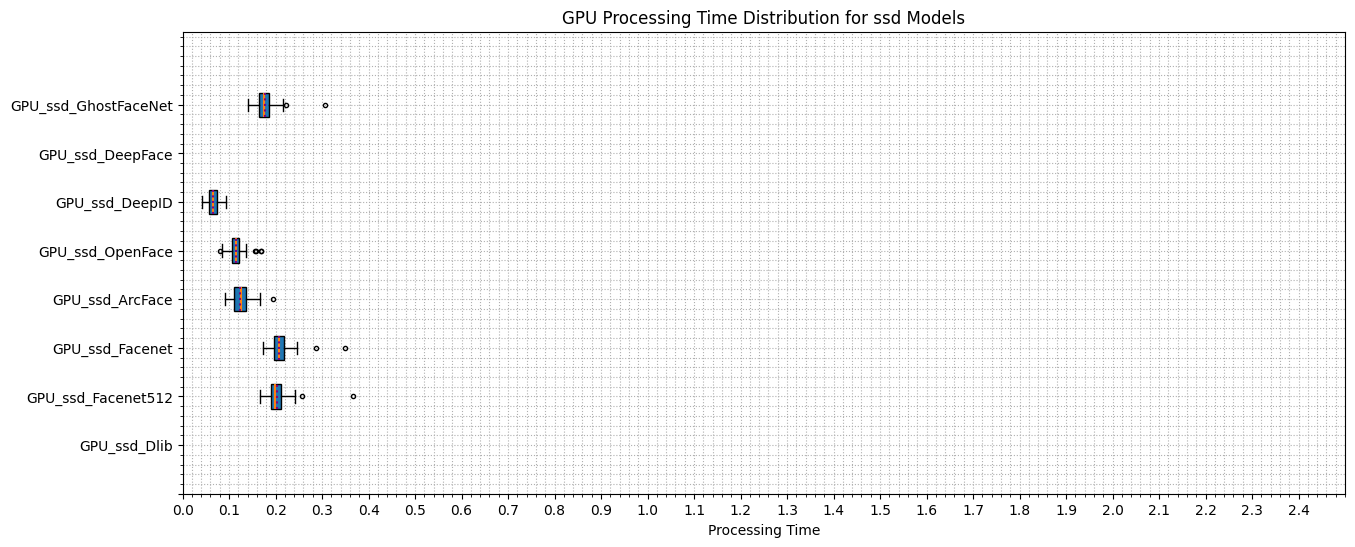

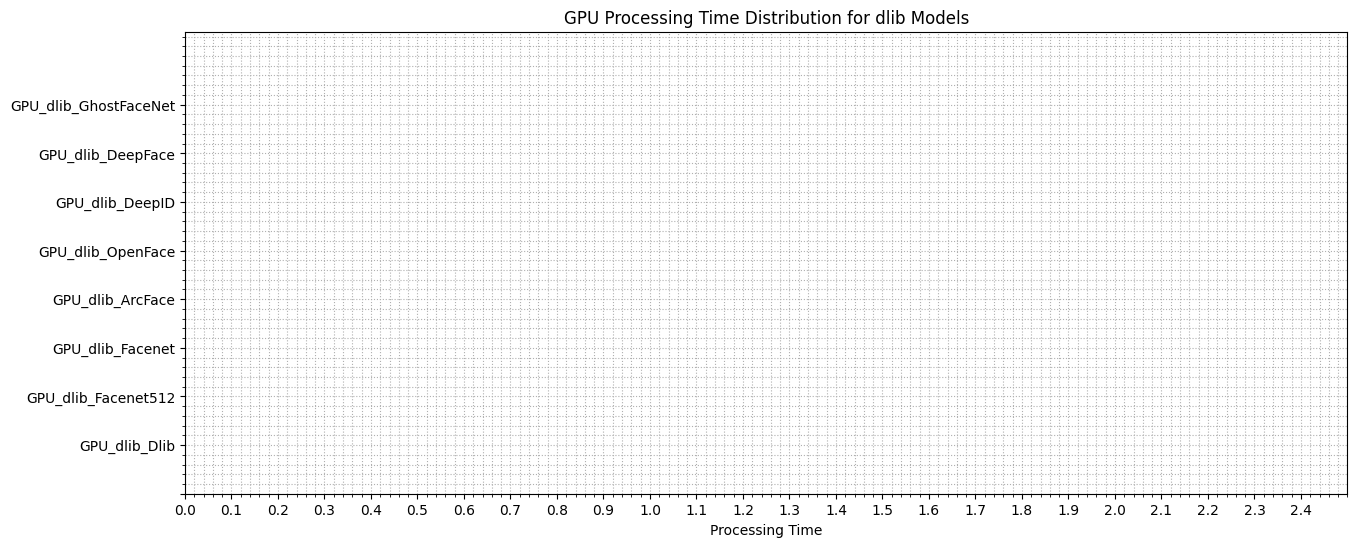

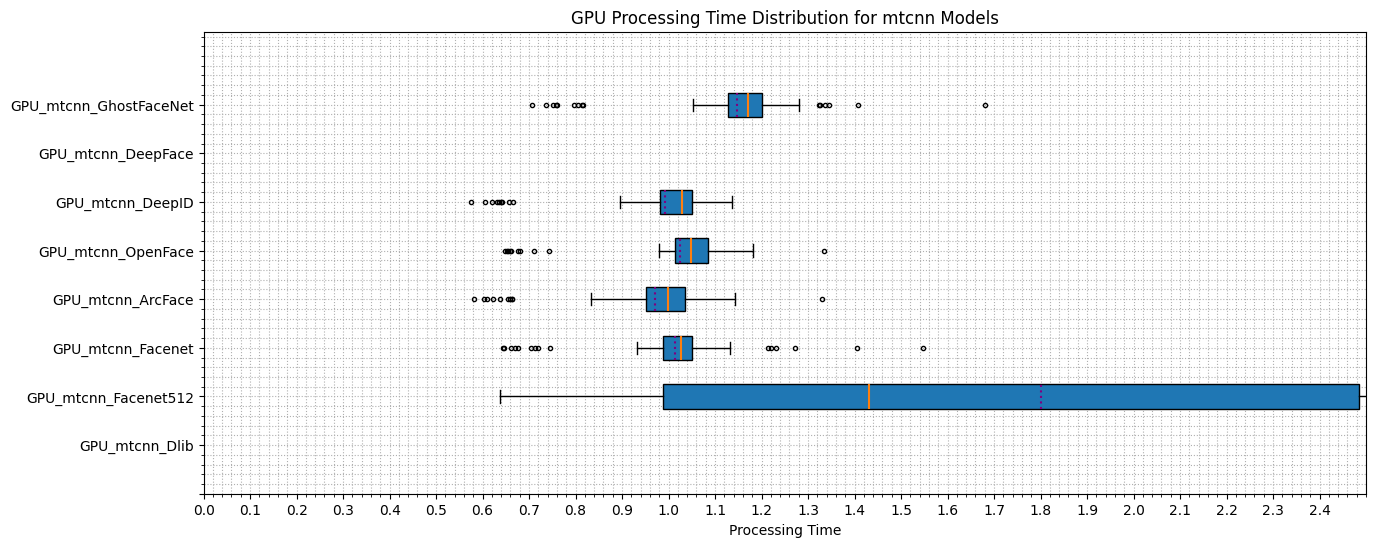

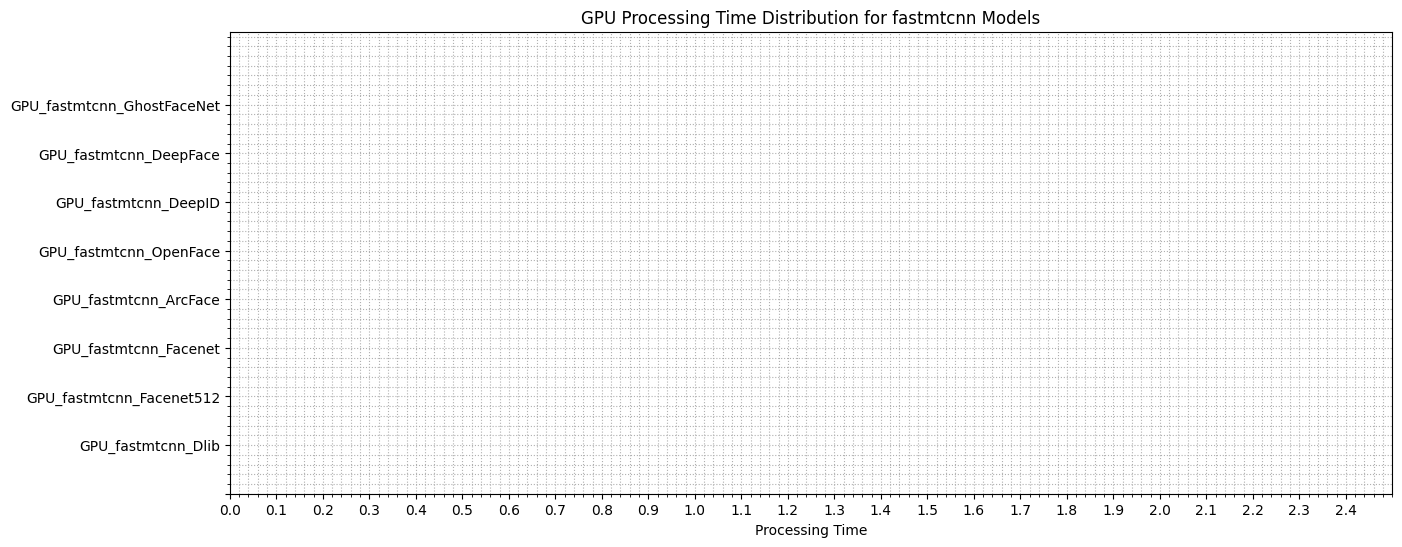

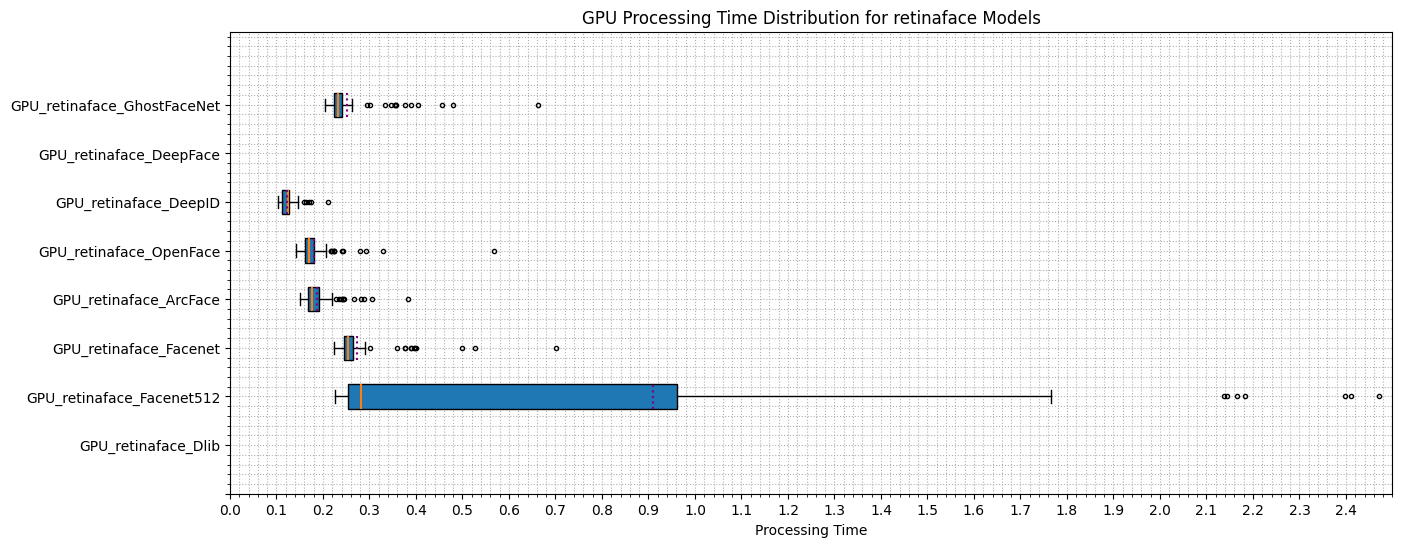

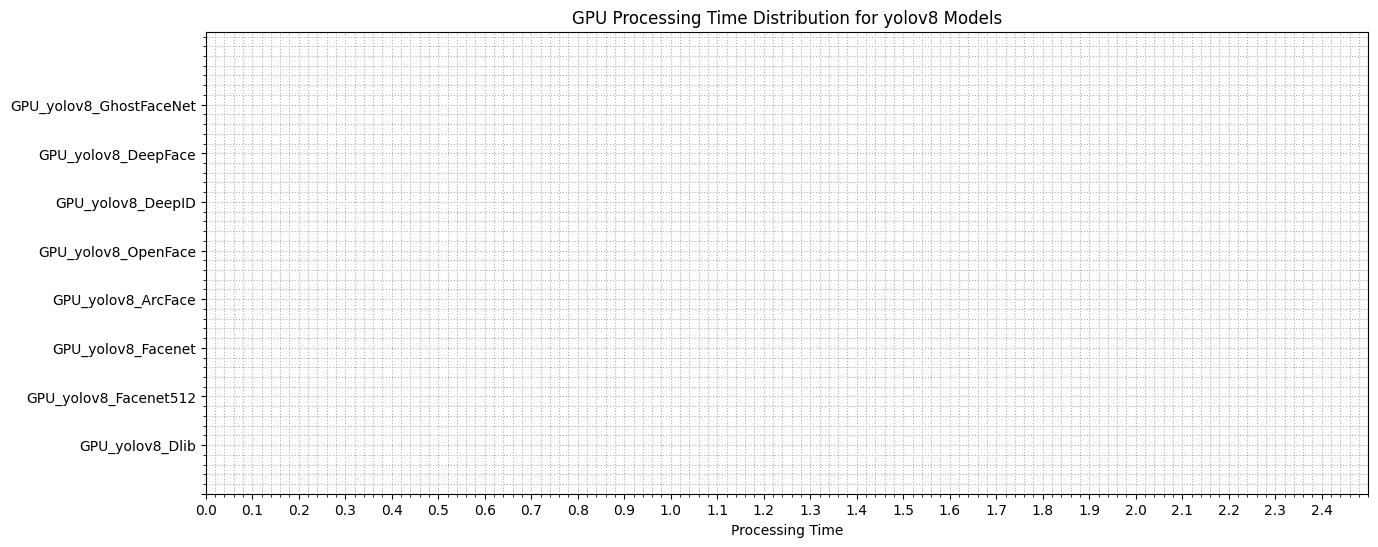

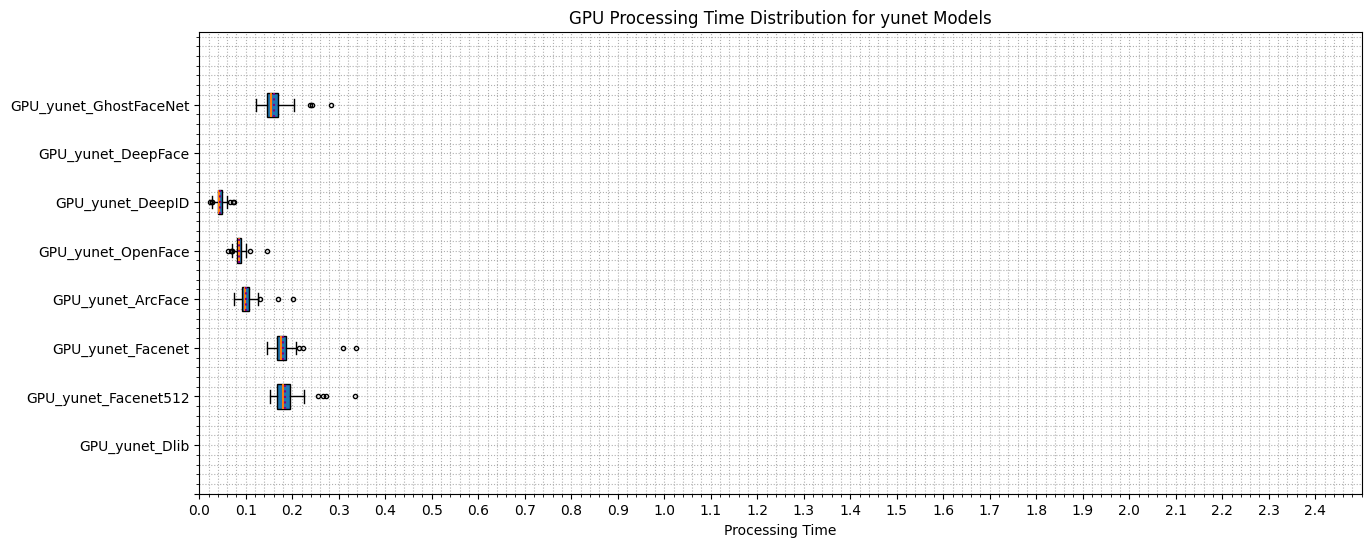

In [53]:

# boxplots para df_Gpu

columns_to_fill = df_gpu.iloc[:, 3:]
column_means = columns_to_fill.mean()

for col in columns_to_fill.columns:
    columns_to_fill[col].fillna(column_means[col].mean(), inplace=True)

df_gpu.iloc[:, 3:] = columns_to_fill



for model_group_name, columns in gpu_model_groups.items():
    fig, ax = plt.subplots(figsize=(15, 6)) 

    data_to_plot = [df_gpu[col] for col in columns]  
    
        
    # ax.boxplot(data_to_plot, vert=False)  # The key change: vert=False
    ax.boxplot(data_to_plot, vert=False, notch=False, patch_artist=True, 
                boxprops={"linewidth": 1}, medianprops={"linewidth": 1.5}, showcaps=True,
                meanprops=dict(linestyle='dotted', linewidth=1.5, color='purple'), meanline=True, showmeans=True,
                showfliers=True, flierprops=dict(markersize=3), whis=1.5) 

    ax.set_yticklabels(columns)  # Adapt labels for horizontal orientation 
    ax.set_xlabel("Processing Time") 
    ax.set_title(f"GPU Processing Time Distribution for {model_group_name} Models")
    
    # y-axis
    major_yticks = np.arange(0, len(columns), 1)  # Adjust spacing as needed
    minor_yticks = np.arange(0, len(columns), 0.5)  
    ax.set_yticks(major_yticks)
    ax.set_yticks(minor_yticks, minor=True)

    # x-axis
    ticks_at_multiples = np.arange(0, 2.5, 0.1)  # Assuming x-axis range is ~0-5
    labels = [str(round(tick, 1)) for tick in ticks_at_multiples]
    ax.set_xticks(ticks_at_multiples)
    ax.set_xticklabels(labels) 

    ax.grid(which='major', axis='both', linestyle='dotted')   
    ax.grid(which='minor', axis='both', linestyle='dotted') 
    ax.minorticks_on()

    ax.set_xlim(0, 2.5)
    

    plt.show()



### Avaliação do dataset CPU

In [65]:
df_cpu = pd.read_csv(REPORT_PATH + 'CPU_all_models_100.csv', sep=';')

for index, row in df_cpu.iterrows():
    # file size
    file_path = row['relative_path']  # Adjust as needed
    file_size = os.path.getsize(file_path.replace('\\', '/'))
    df_cpu.loc[index, 'image_size'] = file_size
    
    # Image Resolution
    with Image.open(file_path.replace('\\', '/')) as img:
        width, height = img.size
        df_cpu.loc[index, 'image_width'] = width
        df_cpu.loc[index, 'image_height'] = height

df_cpu.to_csv(REPORT_PATH+'CPU'+'_all_models'+'_'+str(N_LINES)+'_IMG_DETAILS.csv', sep=';')            
df_cpu.head(3)


Unnamed: 0          filename  \
0           0  001_fe3347c0.jpg   
1           1  002_8f8da10e.jpg   
2           2  003_57612506.jpg   

                                       relative_path  CPU_opencv_Dlib  \
0  imagens/Celebrity Faces Dataset/Angelina Jolie...              NaN   
1  imagens/Celebrity Faces Dataset/Angelina Jolie...              NaN   
2  imagens/Celebrity Faces Dataset/Angelina Jolie...              NaN   

   CPU_opencv_Facenet512  CPU_opencv_Facenet  CPU_opencv_ArcFace  \
0               3.491603            2.198748            1.934824   
1               0.407442            0.338084            0.360428   
2               0.393832            0.338482            0.369146   

   CPU_opencv_OpenFace  CPU_opencv_DeepID  CPU_opencv_DeepFace  ...  \
0             2.060678           0.275469                  NaN  ...   
1             0.241422           0.140599                  NaN  ...   
2             0.213638           0.163696                  NaN  ...   

   CPU_fastmtcnn_Facenet  CPU_fastmtcnn_ArcFace  CPU_fastmtcnn_OpenFace  \
0                    NaN                    NaN                     NaN   
1                    NaN                    NaN                     NaN   
2                    NaN                    NaN                     NaN   

   CPU_fastmtcnn_DeepID  CPU_fastmtcnn_DeepFace  CPU_fastmtcnn_GhostFaceNet  \
0                   NaN                     NaN                         NaN   
1                   NaN                     NaN                         NaN   
2                   NaN                     NaN                         NaN   

   CPU_fastmtcnn_sFace  image_size  image_width  image_height  
0                  NaN     36023.0        474.0         569.0  
1                  NaN     38793.0        474.0         474.0  
2                  NaN     33755.0        474.0         568.0  

[3 rows x 78 columns]

In [55]:
df_cpu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   100 non-null    int64  
 1   filename                     100 non-null    object 
 2   relative_path                100 non-null    object 
 3   CPU_opencv_Dlib              0 non-null      float64
 4   CPU_opencv_Facenet512        98 non-null     float64
 5   CPU_opencv_Facenet           98 non-null     float64
 6   CPU_opencv_ArcFace           98 non-null     float64
 7   CPU_opencv_OpenFace          98 non-null     float64
 8   CPU_opencv_DeepID            98 non-null     float64
 9   CPU_opencv_DeepFace          0 non-null      float64
 10  CPU_opencv_GhostFaceNet      98 non-null     float64
 11  CPU_opencv_sFace             0 non-null      float64
 12  CPU_ssd_Dlib                 0 non-null      float64
 13  CPU_ssd_Facenet512   

In [56]:
df_cpu_desc = df_cpu.describe()

df_cpu_desc

Unnamed: 0  CPU_opencv_Dlib  CPU_opencv_Facenet512  CPU_opencv_Facenet  \
count  100.000000              0.0              98.000000           98.000000   
mean    49.500000              NaN               0.429727            0.430014   
std     29.011492              NaN               0.328639            0.208187   
min      0.000000              NaN               0.254439            0.258803   
25%     24.750000              NaN               0.346632            0.358110   
50%     49.500000              NaN               0.372170            0.379842   
75%     74.250000              NaN               0.415552            0.415288   
max     99.000000              NaN               3.491603            2.198748   

       CPU_opencv_ArcFace  CPU_opencv_OpenFace  CPU_opencv_DeepID  \
count           98.000000            98.000000          98.000000   
mean             0.363145             0.244702           0.141818   
std              0.179293             0.194820           0.037300   
min              0.230481             0.111841           0.055924   
25%              0.303896             0.191229           0.126378   
50%              0.325924             0.217770           0.142262   
75%              0.358454             0.246135           0.165099   
max              1.934824             2.060678           0.275469   

       CPU_opencv_DeepFace  CPU_opencv_GhostFaceNet  CPU_opencv_sFace  ...  \
count                  0.0                98.000000               0.0  ...   
mean                   NaN                 0.426976               NaN  ...   
std                    NaN                 0.422360               NaN  ...   
min                    NaN                 0.243166               NaN  ...   
25%                    NaN                 0.336291               NaN  ...   
50%                    NaN                 0.356952               NaN  ...   
75%                    NaN                 0.384596               NaN  ...   
max                    NaN                 4.458306               NaN  ...   

       CPU_yunet_sFace  CPU_fastmtcnn_Dlib  CPU_fastmtcnn_Facenet512  \
count              0.0                 0.0                       0.0   
mean               NaN                 NaN                       NaN   
std                NaN                 NaN                       NaN   
min                NaN                 NaN                       NaN   
25%                NaN                 NaN                       NaN   
50%                NaN                 NaN                       NaN   
75%                NaN                 NaN                       NaN   
max                NaN                 NaN                       NaN   

       CPU_fastmtcnn_Facenet  CPU_fastmtcnn_ArcFace  CPU_fastmtcnn_OpenFace  \
count                    0.0                    0.0                     0.0   
mean                     NaN                    NaN                     NaN   
std                      NaN                    NaN                     NaN   
min                      NaN                    NaN                     NaN   
25%                      NaN                    NaN                     NaN   
50%                      NaN                    NaN                     NaN   
75%                      NaN                    NaN                     NaN   
max                      NaN                    NaN                     NaN   

       CPU_fastmtcnn_DeepID  CPU_fastmtcnn_DeepFace  \
count                   0.0                     0.0   
mean                    NaN                     NaN   
std                     NaN                     NaN   
min                     NaN                     NaN   
25%                     NaN                     NaN   
50%                     NaN                     NaN   
75%                     NaN                     NaN   
max                     NaN                     NaN   

       CPU_fastmtcnn_GhostFaceNet  CPU_fastmtcnn_sFace  
count                         0.0     

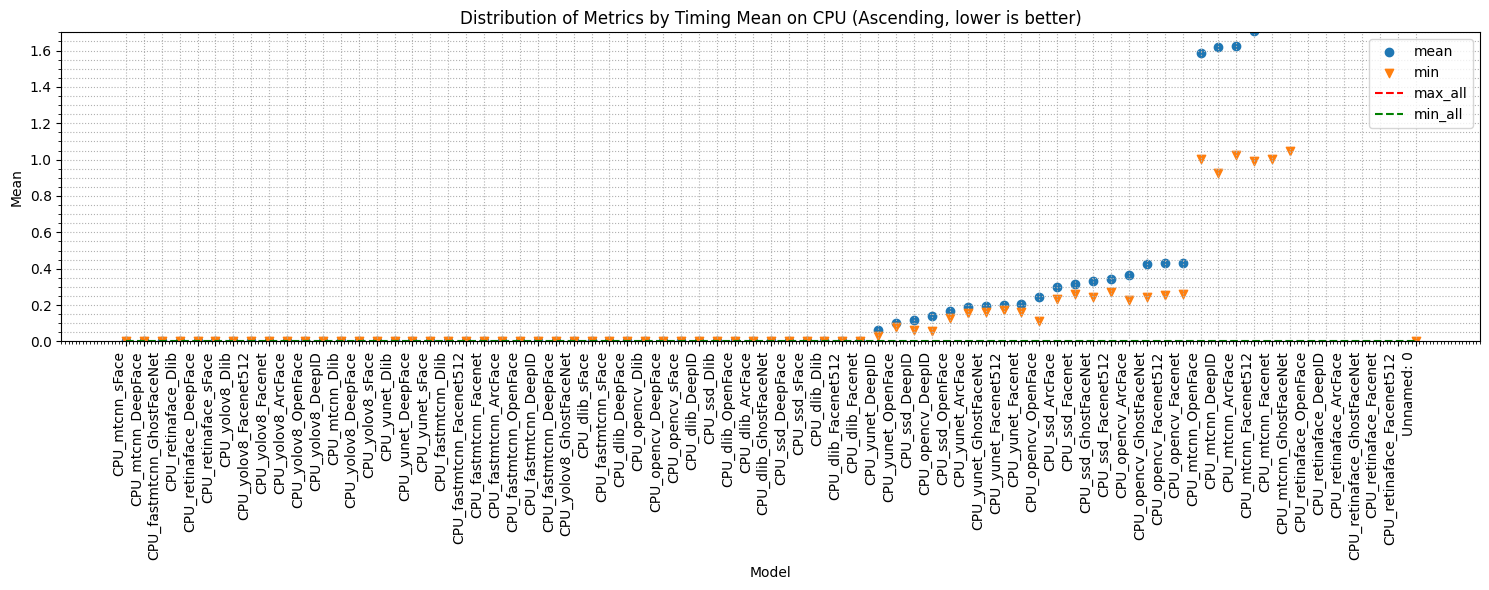

In [57]:
# Grafico das médias de desempenho de cada modelo em CPU

# Drop columns before sorting
columns_to_drop = [col for col in df_cpu_desc.columns if (col.startswith('image') or col == 'CPU_id')]
df_cpu_desc = df_cpu_desc.drop(columns_to_drop, axis=1)

# Ensure "count" is a column (transpose if necessary)
if 'count' in df_cpu_desc.index:
    df_cpu_desc_t = df_cpu_desc.transpose().fillna(0)
    df_cpu_desc_t.index.name = 'metric'  # Optional: Rename index


# Sort by "count" in descending order
df_cpu_desc_t = df_cpu_desc_t.sort_values(by=['mean'], ascending=True)

# Get relevant data for plotting
metrics = df_cpu_desc_t.index.to_list()
means = df_cpu_desc_t['mean'].to_list()
maxs = df_cpu_desc_t['max'].to_list()
mins = df_cpu_desc_t['min'].to_list()

# Create the bar chart
plt.figure(figsize=(15, 6))  # Adjust figure size as needed

# Create the scatter chart
plt.scatter(metrics, means, label='mean')
plt.scatter(metrics, mins, marker='v', label='min')

plt.hlines(y=max(means), xmin=0, xmax=len(metrics)-1, colors='red', linestyle='dashed', label='max_all')
plt.hlines(y=min(means), xmin=0, xmax=len(metrics)-1, colors='green', linestyle='dashed', label='min_all')

plt.ylim(ymax=1.7, ymin=0)

# Customize appearance
plt.xlabel('Model')
plt.ylabel('Mean')
plt.title('Distribution of Metrics by Timing Mean on CPU (Ascending, lower is better)')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping

plt.grid(which='major', axis='both', linestyle='dotted')   
plt.grid(which='minor', axis='y', linestyle='dotted') 
plt.minorticks_on()

plt.legend()
    
plt.show()

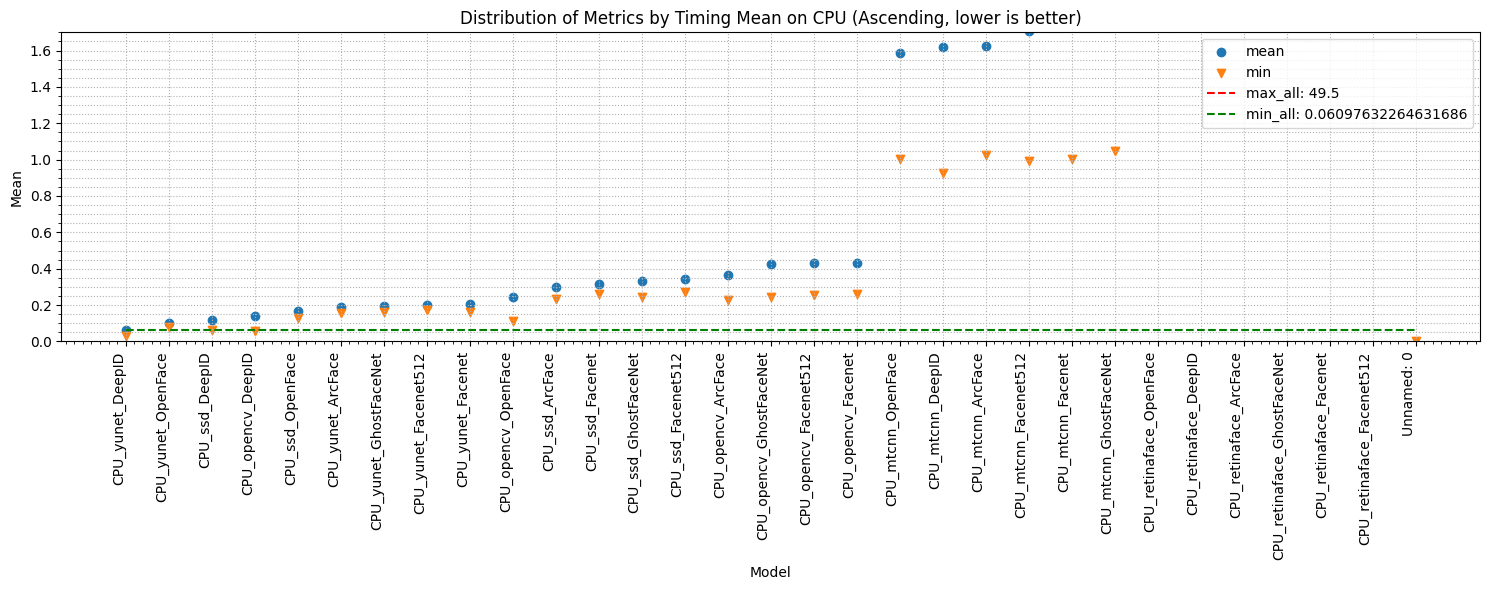

In [73]:
# Grafico das médias de desempenho de cada modelo em CPU, somente com dados válidos

# Drop columns before sorting
columns_to_drop = [col for col in df_cpu_desc.columns if (col.startswith('image') or col == 'CPU_id')]
df_cpu_desc = df_cpu_desc.drop(columns_to_drop, axis=1)

# Ensure "count" is a column (transpose if necessary)
if 'count' in df_cpu_desc.index:
    df_cpu_desc_t = df_cpu_desc.transpose().dropna()
    df_cpu_desc_t.index.name = 'metric'  # Optional: Rename index


# Sort by "count" in descending order
df_cpu_desc_t = df_cpu_desc_t.sort_values(by=['mean'], ascending=True)

# Get relevant data for plotting
metrics = df_cpu_desc_t.index.to_list()
means = df_cpu_desc_t['mean'].to_list()
maxs = df_cpu_desc_t['max'].to_list()
mins = df_cpu_desc_t['min'].to_list()

# Create the bar chart
plt.figure(figsize=(15, 6))  # Adjust figure size as needed
# Create the scatter chart
plt.scatter(metrics, means, label='mean')
plt.scatter(metrics, mins, marker='v', label='min')

plt.hlines(y=max(means), xmin=0, xmax=len(metrics)-1, colors='red', linestyle='dashed', label=f'max_all: {max(means)}')
plt.hlines(y=min(means), xmin=0, xmax=len(metrics)-1, colors='green', linestyle='dashed', label=f'min_all: {min(means)}')

plt.ylim(ymax=1.7, ymin=0)


# Customize appearance
plt.xlabel('Model')
plt.ylabel('Mean')
plt.title('Distribution of Metrics by Timing Mean on CPU (Ascending, lower is better)')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping

plt.grid(which='major', axis='both', linestyle='dotted')   
plt.grid(which='minor', axis='y', linestyle='dotted') 
plt.minorticks_on()
    
plt.legend()

plt.show()

In [67]:
df_cpu_desc.to_csv(REPORT_PATH + 'CPU_details.csv', sep=';')

### Grupos de modelos

In [68]:
cpu_model_groups = {
    "opencv": [
        "CPU_opencv_Dlib",  
        "CPU_opencv_Facenet512", 
        "CPU_opencv_Facenet",
        "CPU_opencv_ArcFace", 
        "CPU_opencv_OpenFace", 
        "CPU_opencv_DeepID", 
        "CPU_opencv_DeepFace",  
        "CPU_opencv_GhostFaceNet",  
        "CPU_opencv_sFace" 
    ],
    "ssd": [ 
        "CPU_ssd_Dlib",
        "CPU_ssd_Facenet512",
        "CPU_ssd_Facenet",
        "CPU_ssd_ArcFace",
        "CPU_ssd_OpenFace",
        "CPU_ssd_DeepID",
        "CPU_ssd_DeepFace",
        "CPU_ssd_GhostFaceNet",
        "CPU_ssd_sFace"
    ],
    "dlib": [ 
        "CPU_dlib_Dlib",
        "CPU_dlib_Facenet512",
        "CPU_dlib_Facenet",
        "CPU_dlib_ArcFace",
        "CPU_dlib_OpenFace",
        "CPU_dlib_DeepID",
        "CPU_dlib_DeepFace",
        "CPU_dlib_GhostFaceNet",
        "CPU_dlib_sFace"
    ],
    "mtcnn": [ 
        "CPU_mtcnn_Dlib",
        "CPU_mtcnn_Facenet512",
        "CPU_mtcnn_Facenet",
        "CPU_mtcnn_ArcFace",
        "CPU_mtcnn_OpenFace",
        "CPU_mtcnn_DeepID",
        "CPU_mtcnn_DeepFace",
        "CPU_mtcnn_GhostFaceNet",
        "CPU_mtcnn_sFace"
    ],
    "fastmtcnn": [ 
        "CPU_fastmtcnn_Dlib",
        "CPU_fastmtcnn_Facenet512",
        "CPU_fastmtcnn_Facenet",
        "CPU_fastmtcnn_ArcFace",
        "CPU_fastmtcnn_OpenFace",
        "CPU_fastmtcnn_DeepID",
        "CPU_fastmtcnn_DeepFace",
        "CPU_fastmtcnn_GhostFaceNet",
        "CPU_fastmtcnn_sFace"
    ],
    "retinaface": [ 
        "CPU_retinaface_Dlib",
        "CPU_retinaface_Facenet512",
        "CPU_retinaface_Facenet",
        "CPU_retinaface_ArcFace",
        "CPU_retinaface_OpenFace",
        "CPU_retinaface_DeepID",
        "CPU_retinaface_DeepFace",
        "CPU_retinaface_GhostFaceNet",
        "CPU_retinaface_sFace"
    ],
    "yolov8": [ 
        "CPU_yolov8_Dlib",
        "CPU_yolov8_Facenet512",
        "CPU_yolov8_Facenet",
        "CPU_yolov8_ArcFace",
        "CPU_yolov8_OpenFace",
        "CPU_yolov8_DeepID",
        "CPU_yolov8_DeepFace",
        "CPU_yolov8_GhostFaceNet",
        "CPU_yolov8_sFace"
    ],
    "yunet": [ 
        "CPU_yunet_Dlib",
        "CPU_yunet_Facenet512",
        "CPU_yunet_Facenet",
        "CPU_yunet_ArcFace",
        "CPU_yunet_OpenFace",
        "CPU_yunet_DeepID",
        "CPU_yunet_DeepFace",
        "CPU_yunet_GhostFaceNet",
        "CPU_yunet_sFace"
    ],
}




In [74]:
df_cpu.columns = ['CPU_id', 'filename', 'relative_path', 'CPU_opencv_Dlib',
       'CPU_opencv_Facenet512', 'CPU_opencv_Facenet', 'CPU_opencv_ArcFace',
       'CPU_opencv_OpenFace', 'CPU_opencv_DeepID', 'CPU_opencv_DeepFace',
       'CPU_opencv_GhostFaceNet', 'CPU_opencv_sFace', 'CPU_ssd_Dlib',
       'CPU_ssd_Facenet512', 'CPU_ssd_Facenet', 'CPU_ssd_ArcFace',
       'CPU_ssd_OpenFace', 'CPU_ssd_DeepID', 'CPU_ssd_DeepFace',
       'CPU_ssd_GhostFaceNet', 'CPU_ssd_sFace', 'CPU_dlib_Dlib',
       'CPU_dlib_Facenet512', 'CPU_dlib_Facenet', 'CPU_dlib_ArcFace',
       'CPU_dlib_OpenFace', 'CPU_dlib_DeepID', 'CPU_dlib_DeepFace',
       'CPU_dlib_GhostFaceNet', 'CPU_dlib_sFace', 'CPU_mtcnn_Dlib',
       'CPU_mtcnn_Facenet512', 'CPU_mtcnn_Facenet', 'CPU_mtcnn_ArcFace',
       'CPU_mtcnn_OpenFace', 'CPU_mtcnn_DeepID', 'CPU_mtcnn_DeepFace',
       'CPU_mtcnn_GhostFaceNet', 'CPU_mtcnn_sFace', 'CPU_retinaface_Dlib',
       'CPU_retinaface_Facenet512', 'CPU_retinaface_Facenet',
       'CPU_retinaface_ArcFace', 'CPU_retinaface_OpenFace',
       'CPU_retinaface_DeepID', 'CPU_retinaface_DeepFace',
       'CPU_retinaface_GhostFaceNet', 'CPU_retinaface_sFace',
       'CPU_yolov8_Dlib', 'CPU_yolov8_Facenet512', 'CPU_yolov8_Facenet',
       'CPU_yolov8_ArcFace', 'CPU_yolov8_OpenFace', 'CPU_yolov8_DeepID',
       'CPU_yolov8_DeepFace', 'CPU_yolov8_GhostFaceNet', 'CPU_yolov8_sFace',
       'CPU_yunet_Dlib', 'CPU_yunet_Facenet512', 'CPU_yunet_Facenet',
       'CPU_yunet_ArcFace', 'CPU_yunet_OpenFace', 'CPU_yunet_DeepID',
       'CPU_yunet_DeepFace', 'CPU_yunet_GhostFaceNet', 'CPU_yunet_sFace',
       'CPU_fastmtcnn_Dlib', 'CPU_fastmtcnn_Facenet512',
       'CPU_fastmtcnn_Facenet', 'CPU_fastmtcnn_ArcFace',
       'CPU_fastmtcnn_OpenFace', 'CPU_fastmtcnn_DeepID',
       'CPU_fastmtcnn_DeepFace', 'CPU_fastmtcnn_GhostFaceNet',
       'CPU_fastmtcnn_sFace', 'image_size', 'image_width', 'image_height']

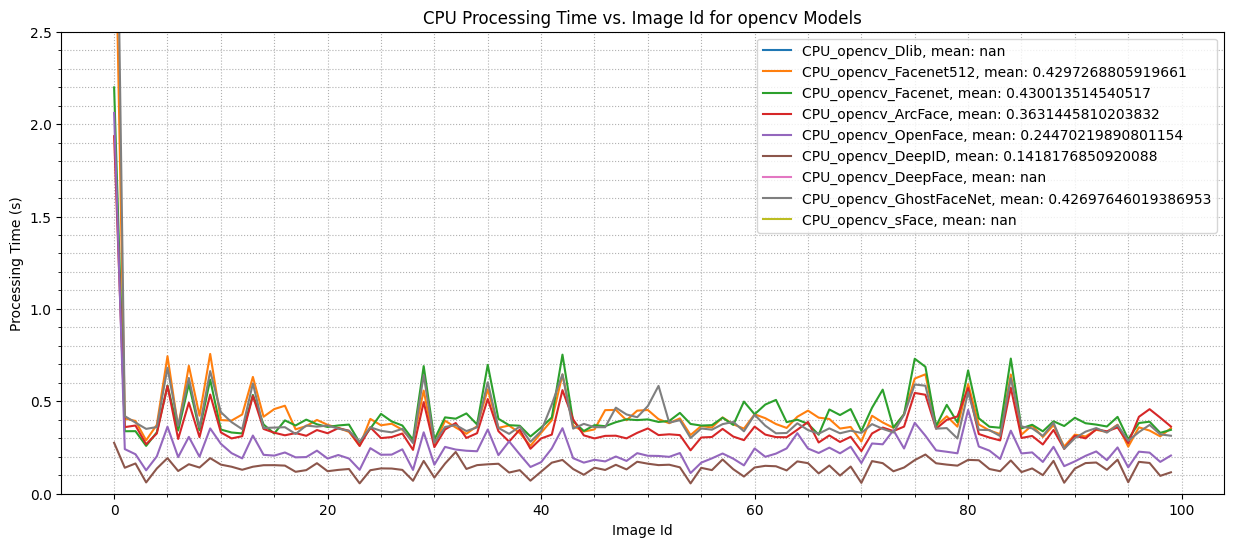

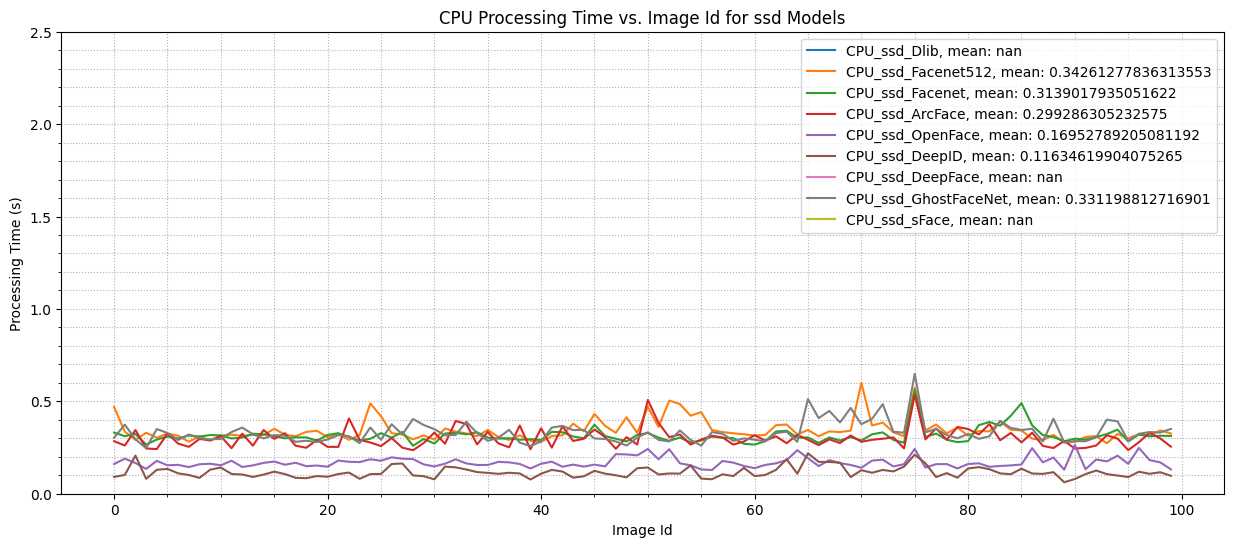

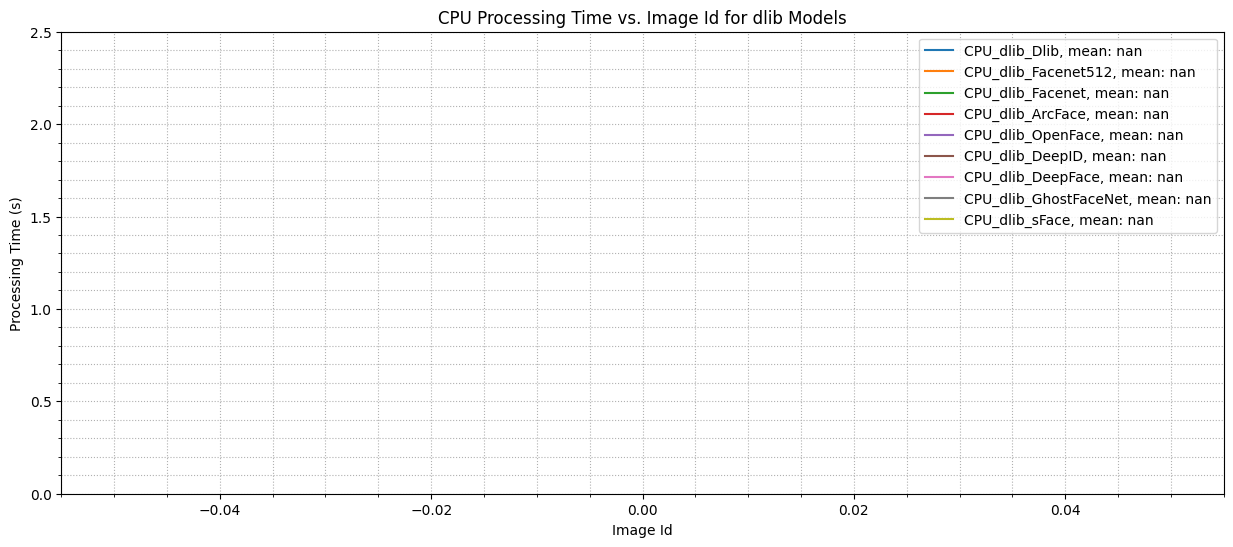

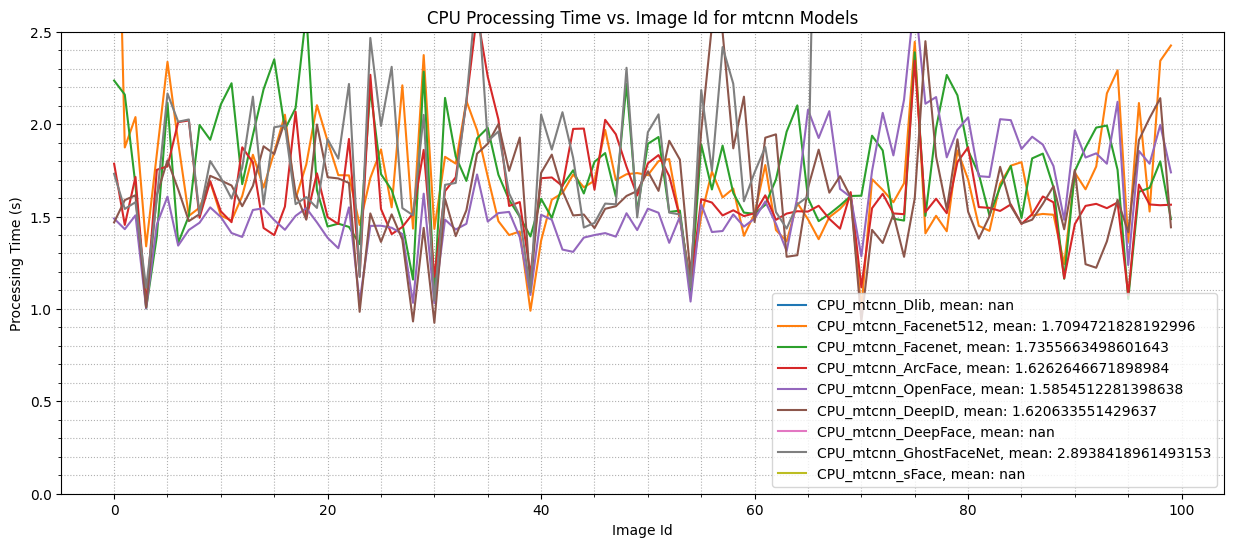

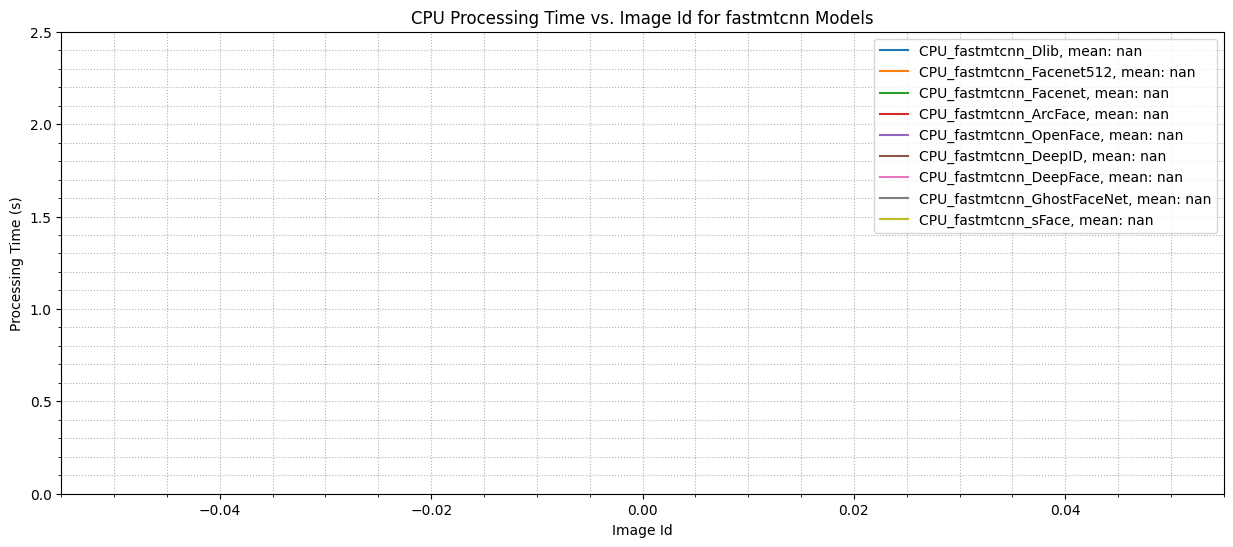

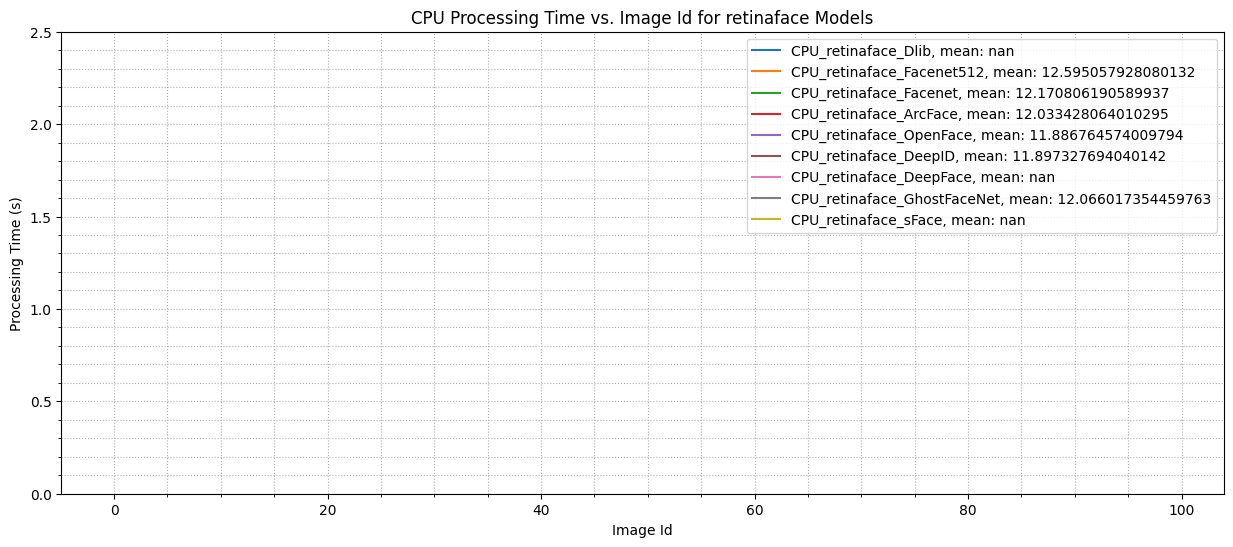

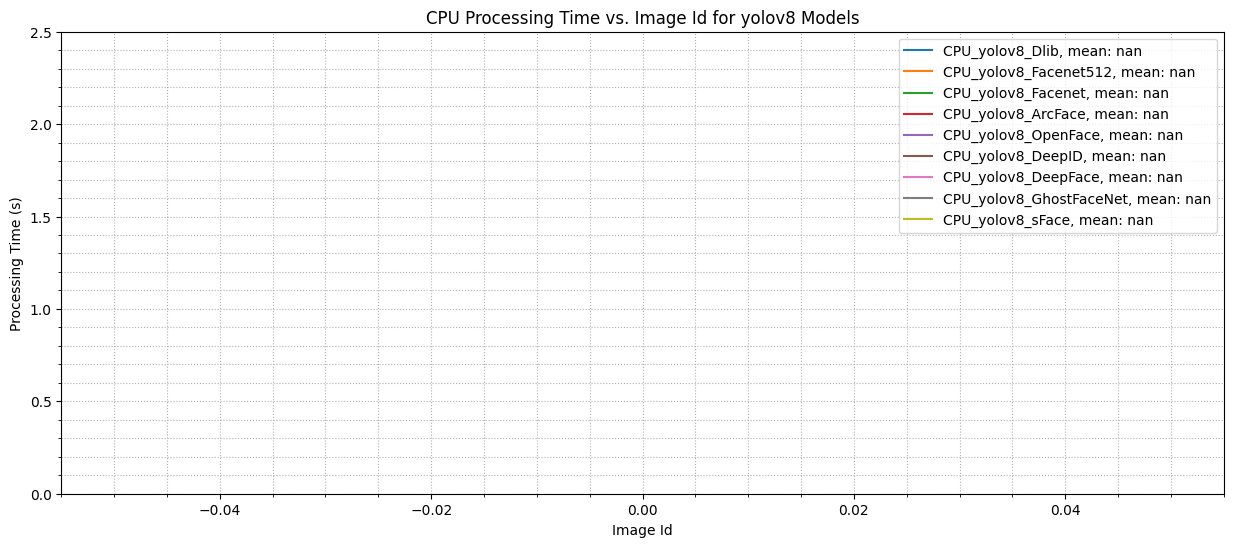

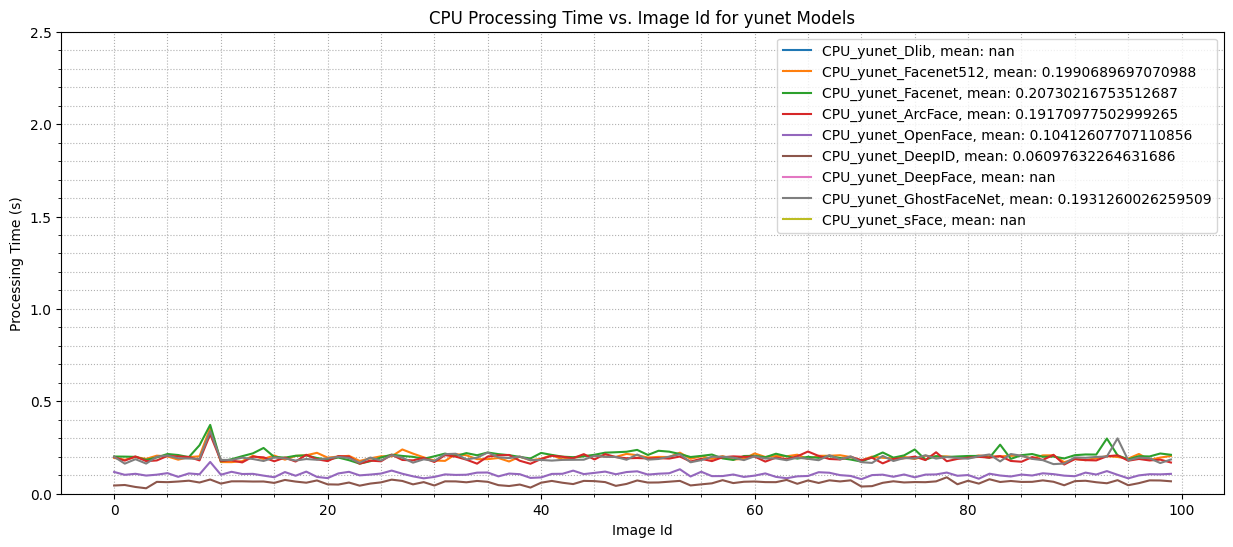

In [75]:
for model_group_name, columns in cpu_model_groups.items():
    fig, ax = plt.subplots(figsize=(15, 6))  # Create figure with desired size

    for col in columns:
        ax.plot(df_cpu['CPU_id'], df_cpu[col], label=f'{col}, mean: {np.mean(df_cpu[col])}')  # Plot on the current axis 'ax'

    ax.set_ylim(ymax=2.5, ymin=0)
    ax.set_xlabel('Image Id')  # Set labels for the current axis
    ax.set_ylabel("Processing Time (s)")
    ax.set_title(f"CPU Processing Time vs. Image Id for {model_group_name} Models")
    ax.legend() 

    ax.grid(which='major', axis='both', linestyle='dotted')   
    ax.grid(which='minor', axis='both', linestyle='dotted') 
    ax.minorticks_on()
    
    plt.show()

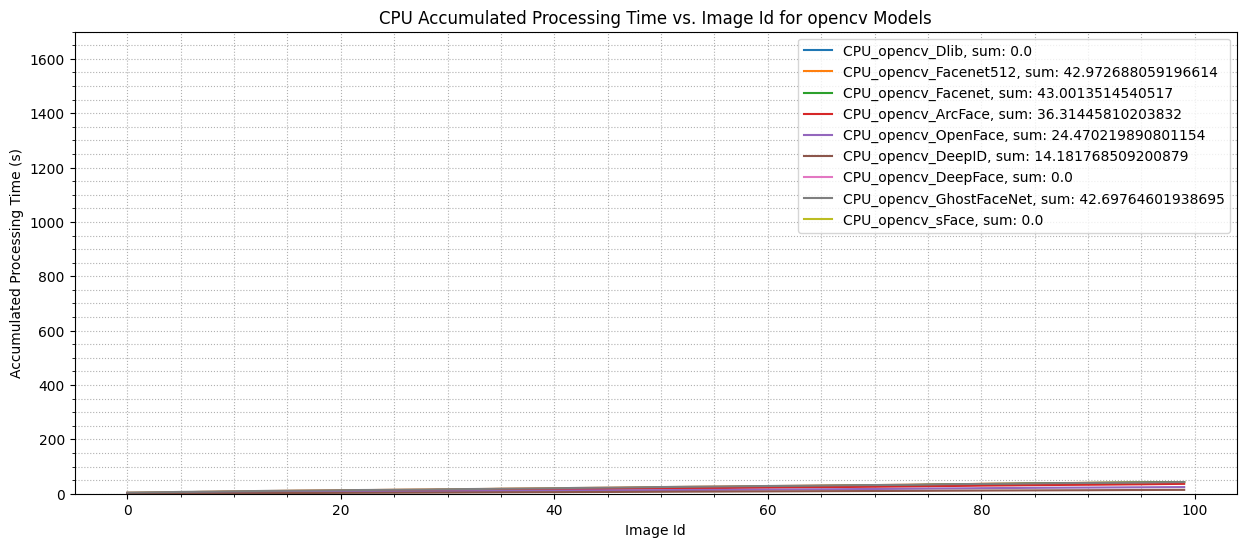

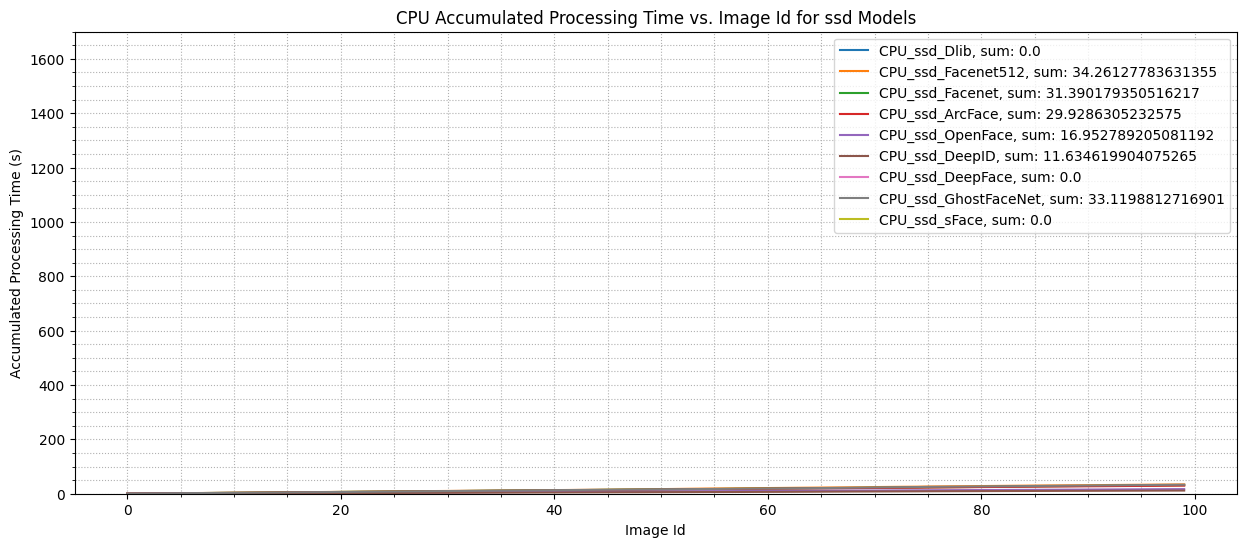

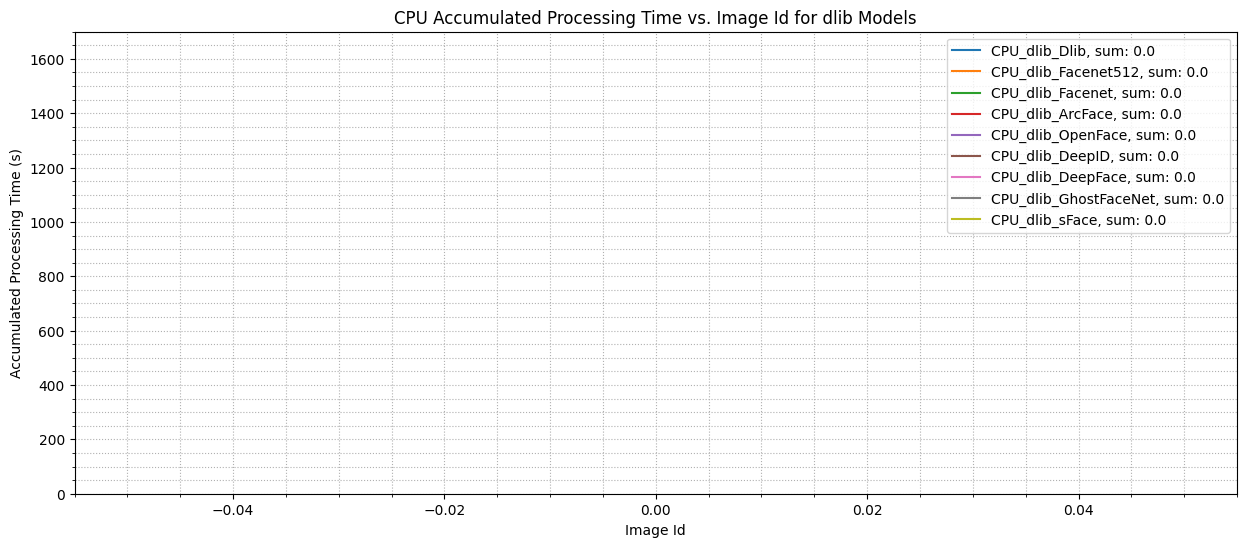

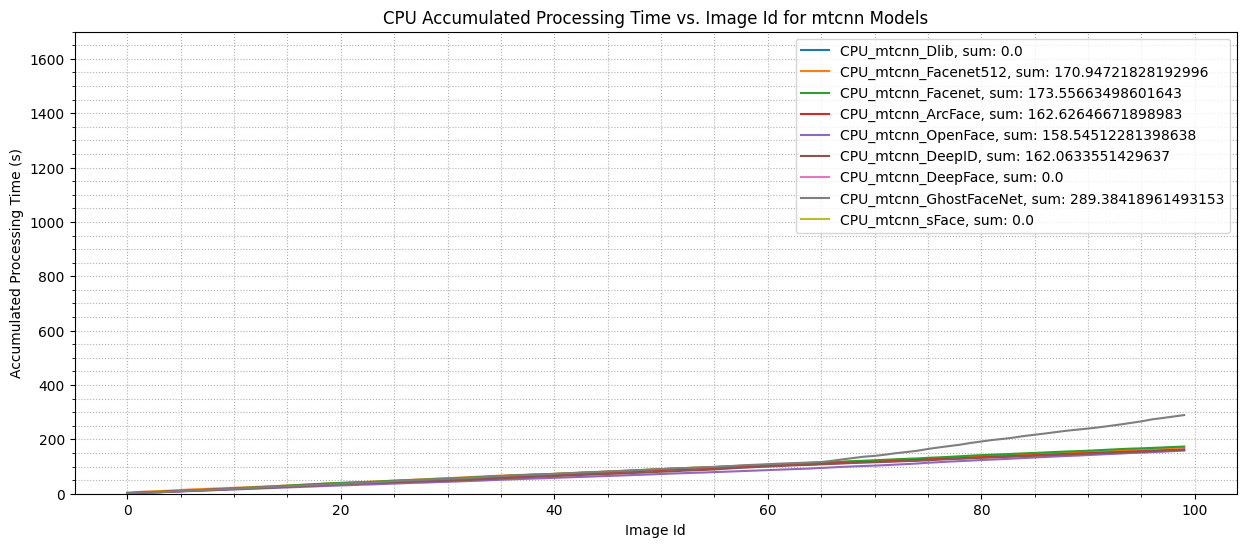

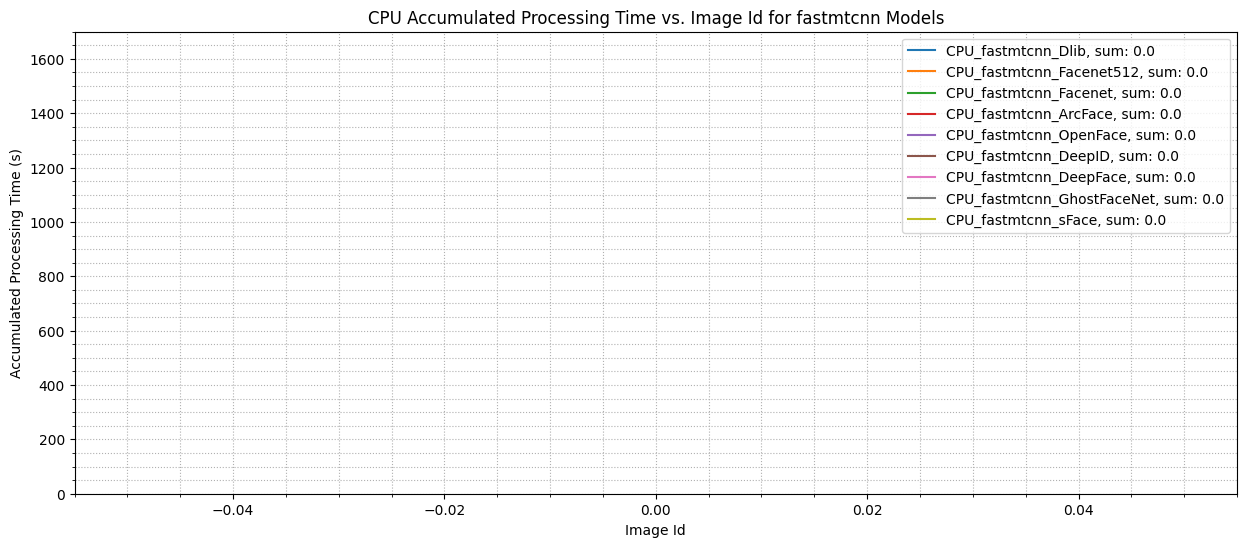

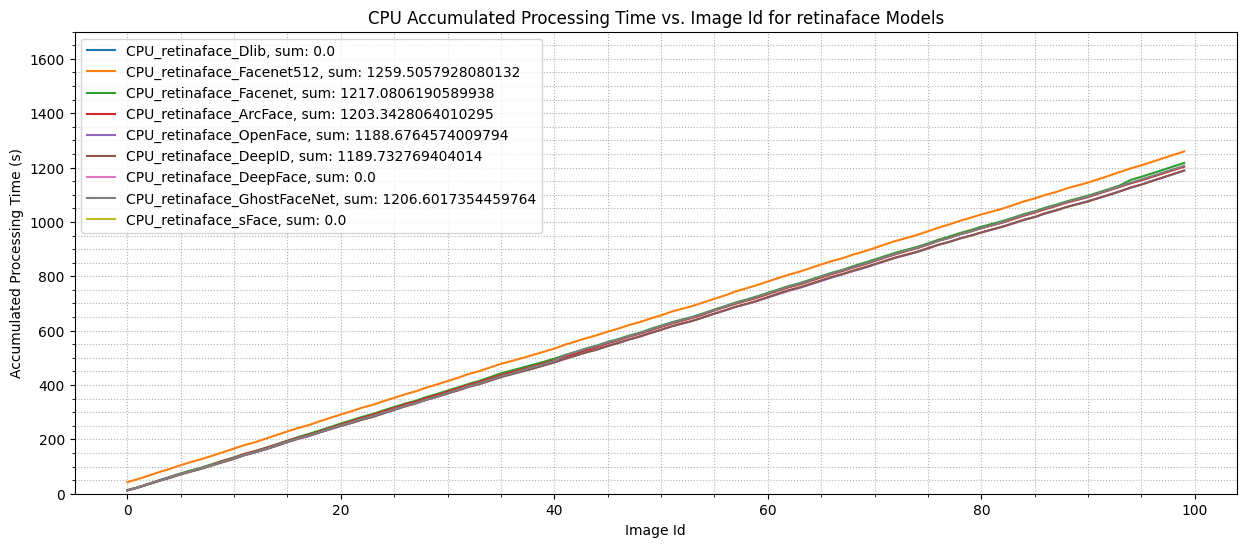

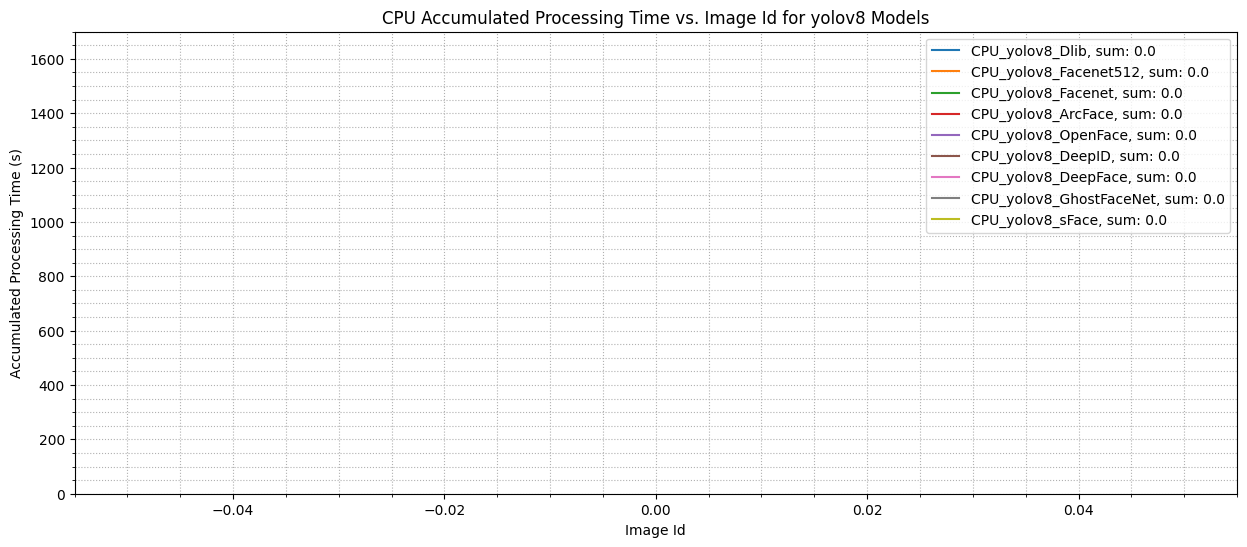

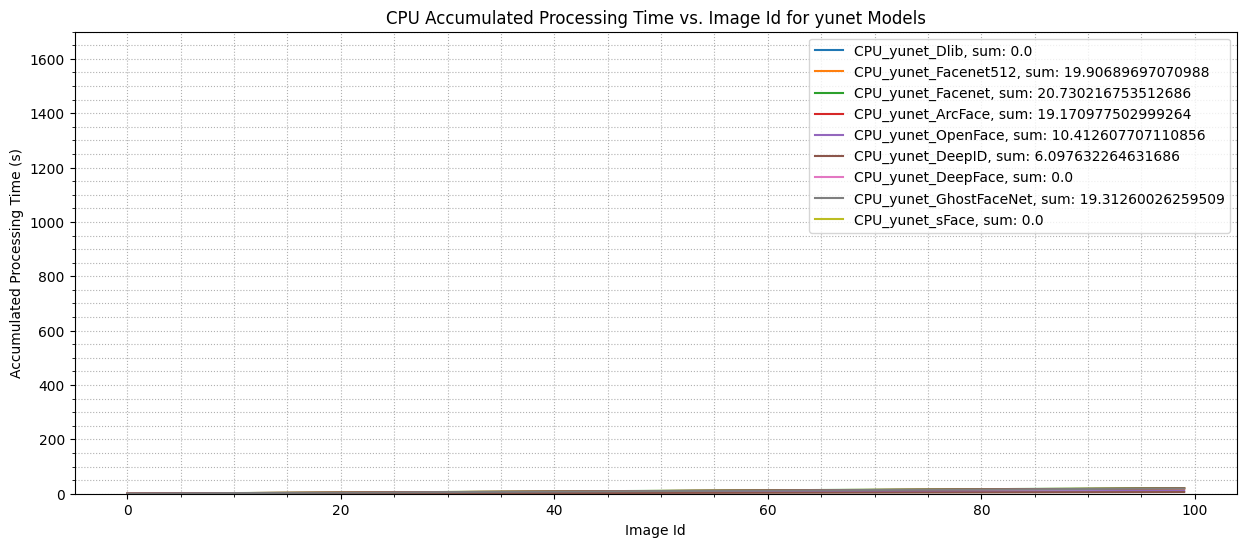

In [76]:
for model_group_name, columns in cpu_model_groups.items():
    fig, ax = plt.subplots(figsize=(15, 6)) 

    for col in columns:
        data = df_cpu[col]
        cumulative_data = data.cumsum() 
        ax.plot(df_cpu['CPU_id'], cumulative_data, label=f'{col}, sum: {np.sum(df_cpu[col])}') 

    ax.set_ylim(ymax=1700, ymin=0)  # Adjust ymax as needed
    ax.set_xlabel('Image Id')
    ax.set_ylabel("Accumulated Processing Time (s)")  # Modified label
    ax.set_title(f"CPU Accumulated Processing Time vs. Image Id for {model_group_name} Models")
    ax.legend() 
    
    ax.grid(which='major', axis='both', linestyle='dotted')   
    ax.grid(which='minor', axis='both', linestyle='dotted') 
    ax.minorticks_on()

    plt.show()

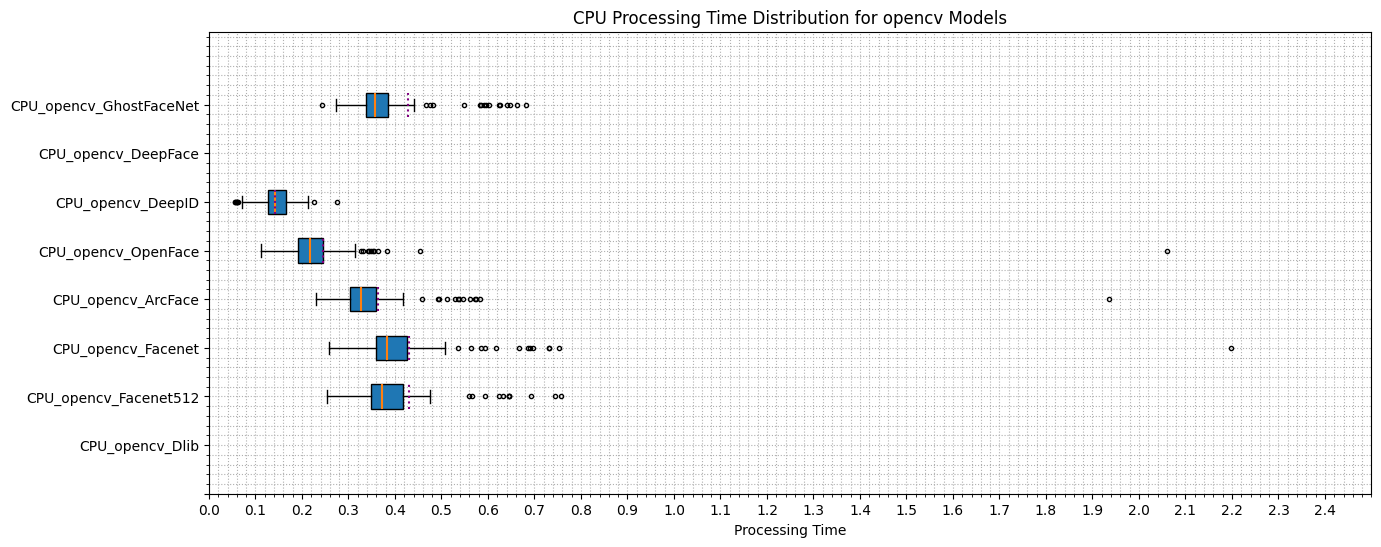

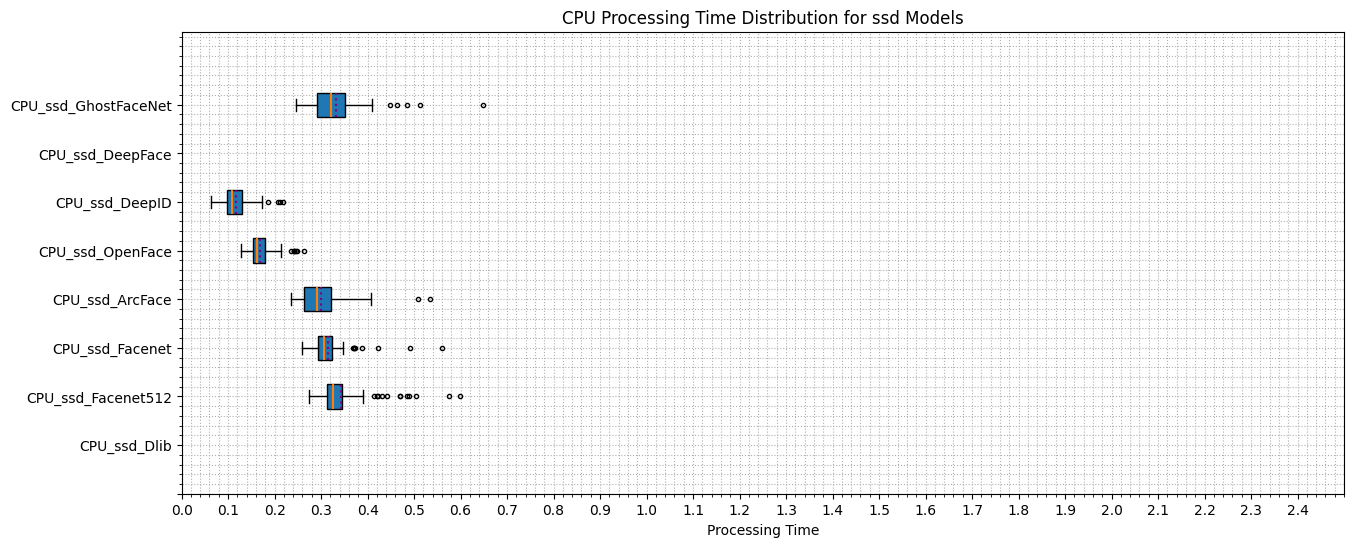

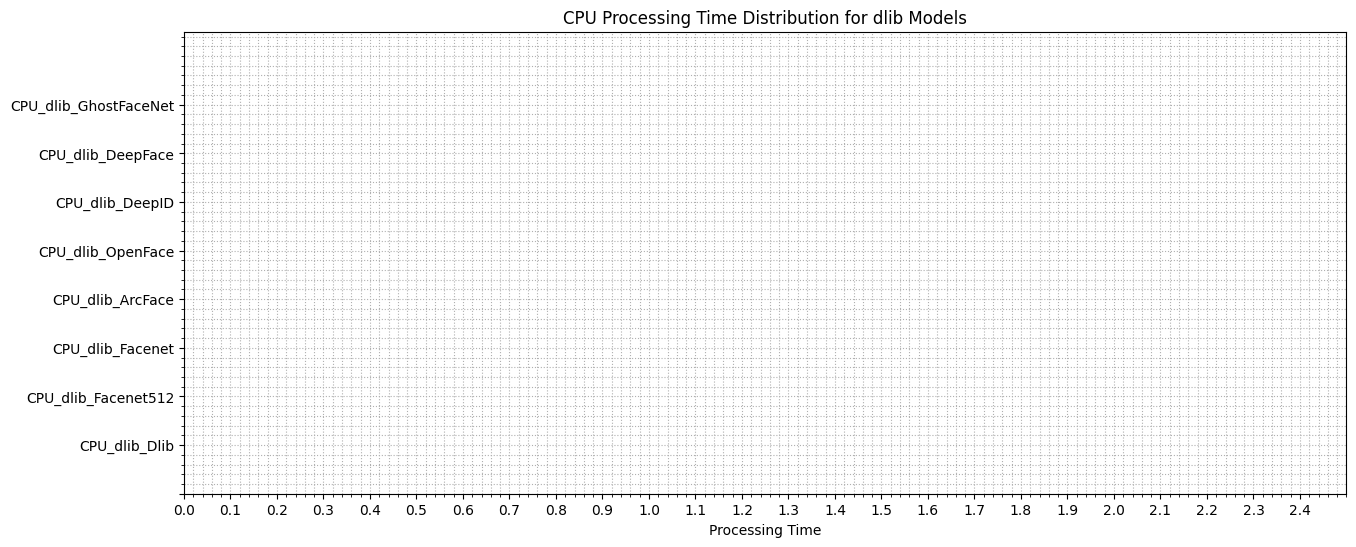

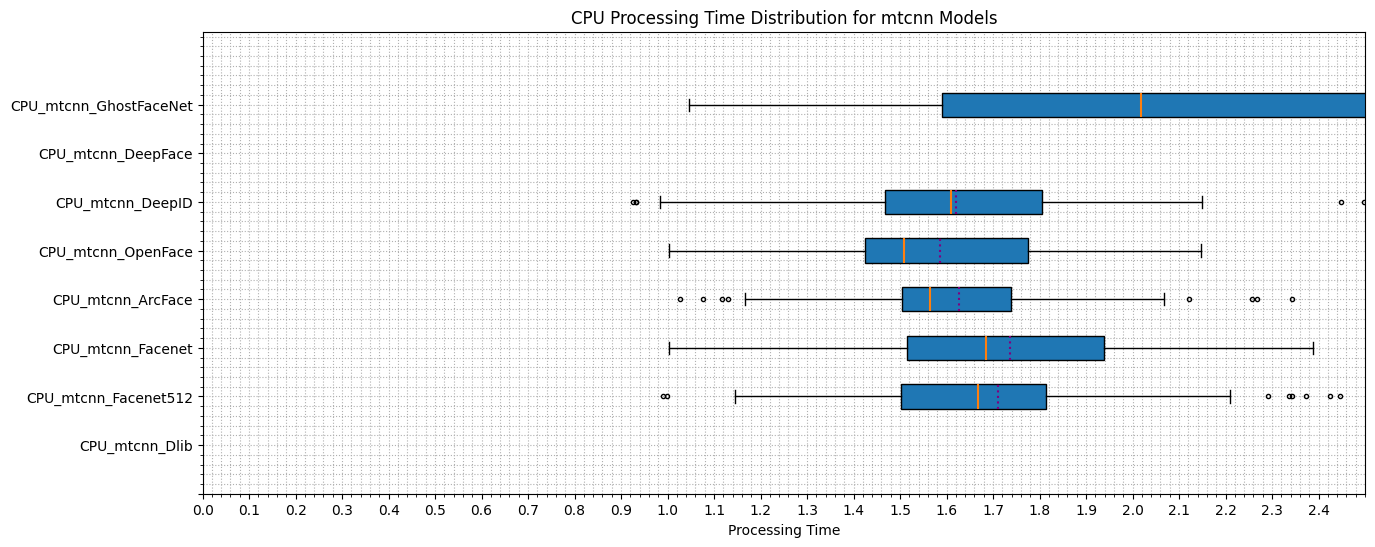

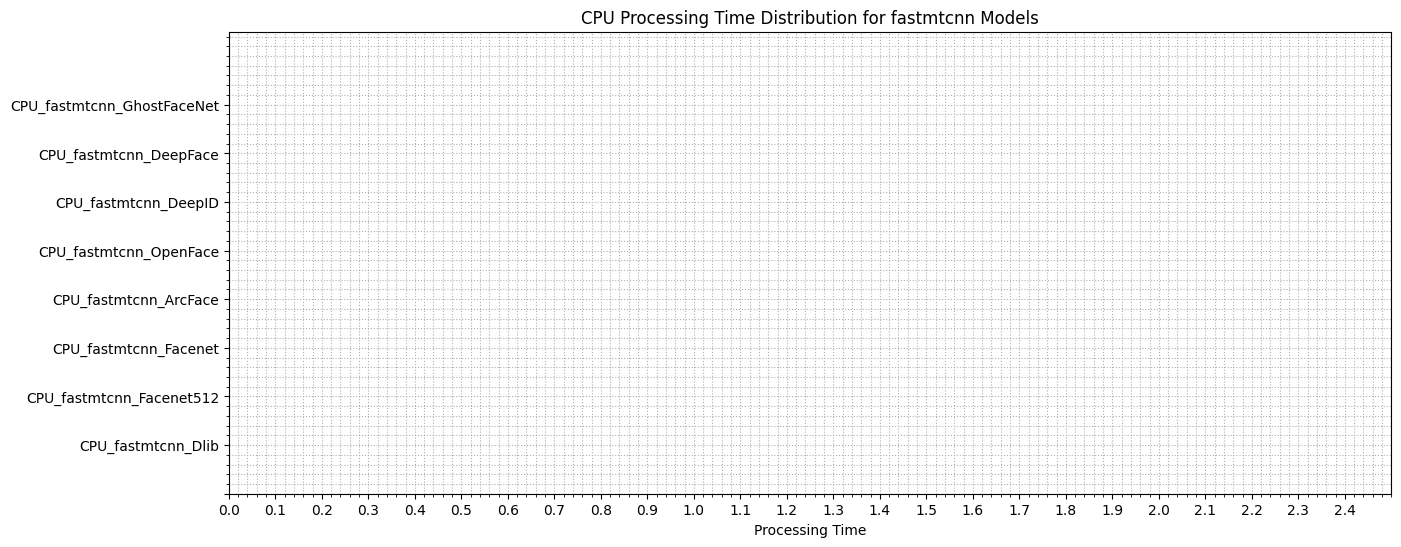

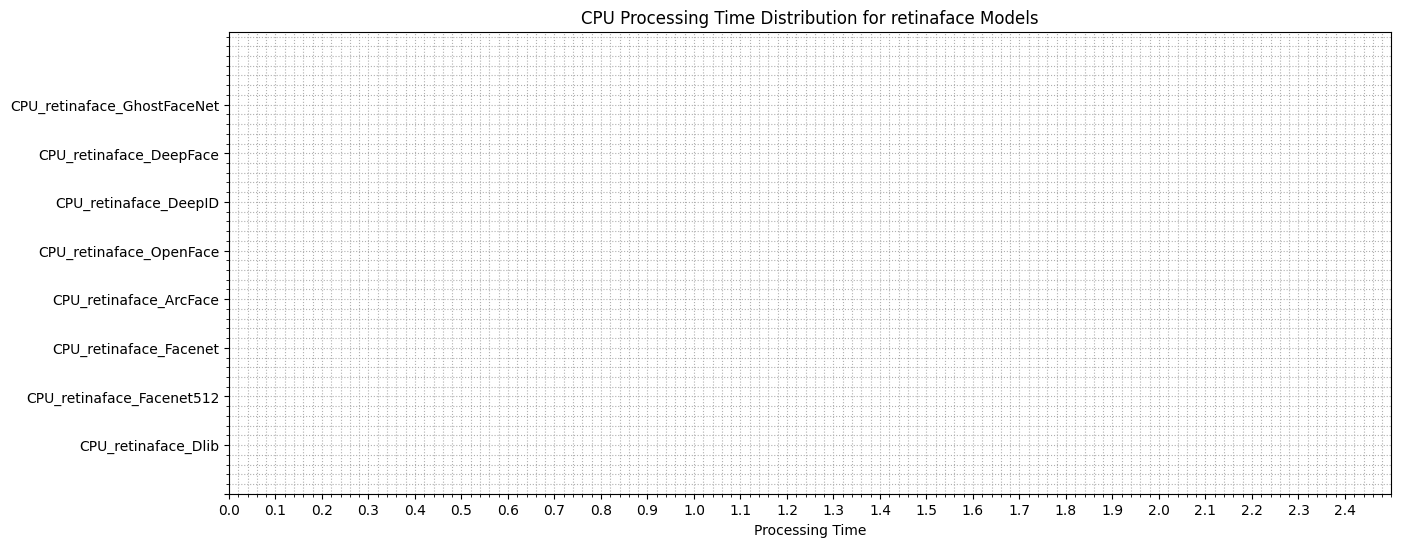

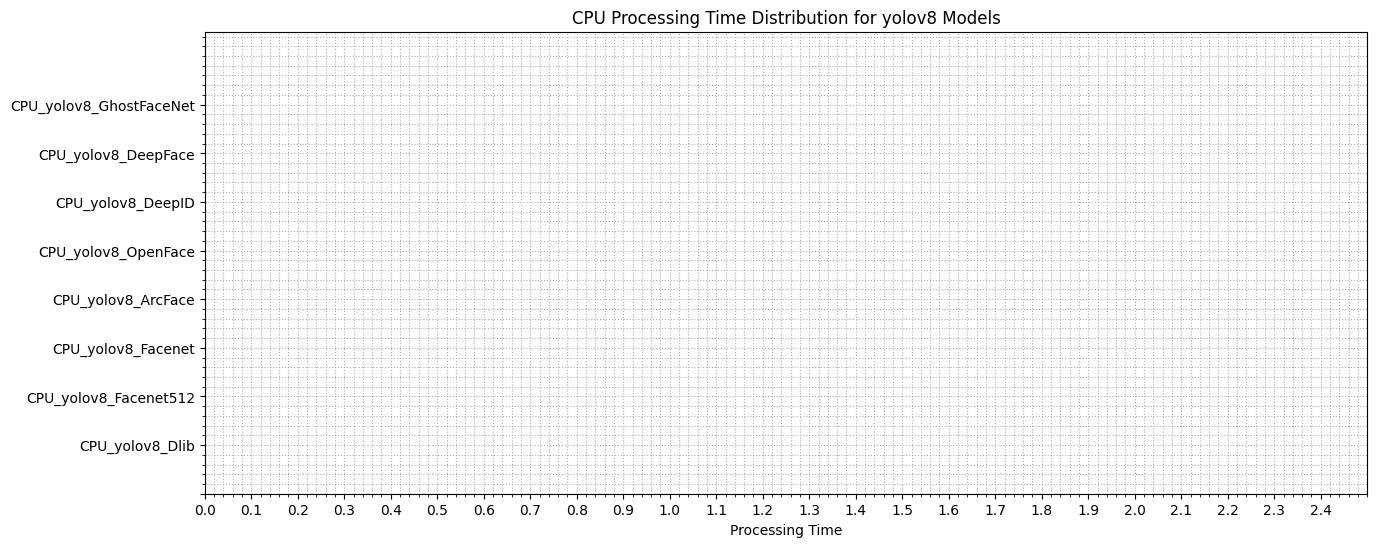

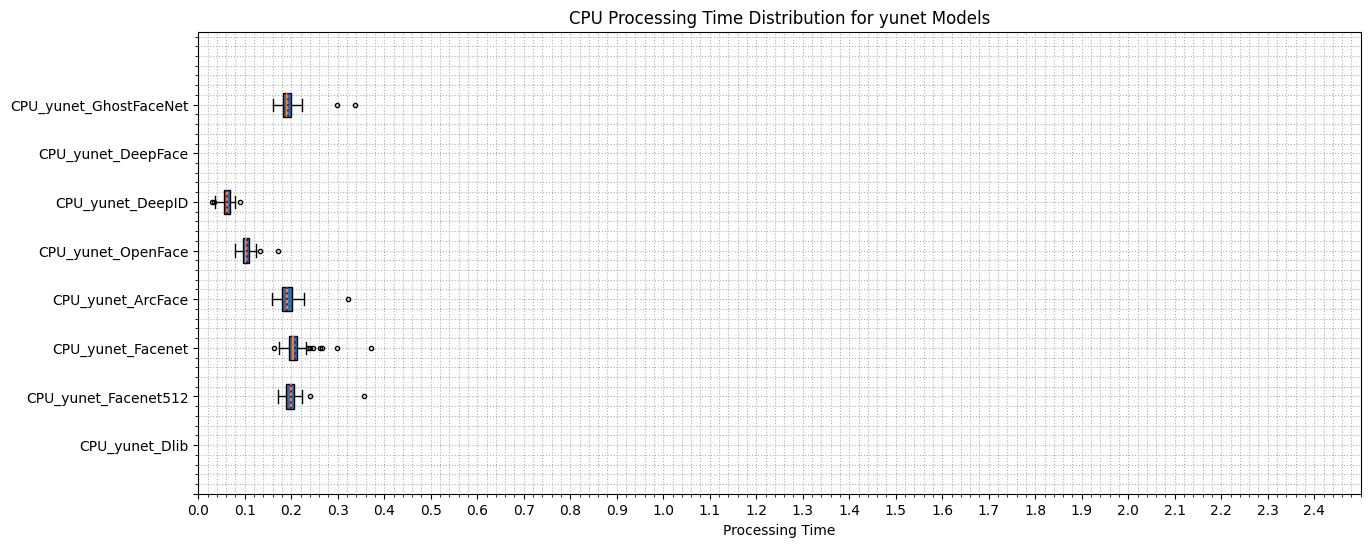

In [77]:
# boxplots para df_cpu

columns_to_fill = df_cpu.iloc[:, 3:]
column_means = columns_to_fill.mean()

for col in columns_to_fill.columns:
    columns_to_fill[col].fillna(column_means[col].mean(), inplace=True)

df_cpu.iloc[:, 3:] = columns_to_fill



for model_group_name, columns in cpu_model_groups.items():
    fig, ax = plt.subplots(figsize=(15, 6)) 

    data_to_plot = [df_cpu[col] for col in columns]  
    
        
    # ax.boxplot(data_to_plot, vert=False)  # The key change: vert=False
    ax.boxplot(data_to_plot, vert=False, notch=False, patch_artist=True, 
                boxprops={"linewidth": 1}, medianprops={"linewidth": 1.5}, showcaps=True,
                meanprops=dict(linestyle='dotted', linewidth=1.5, color='purple'), meanline=True, showmeans=True,
                showfliers=True, flierprops=dict(markersize=3), whis=1.5) 

    ax.set_yticklabels(columns)  # Adapt labels for horizontal orientation 
    ax.set_xlabel("Processing Time") 
    ax.set_title(f"CPU Processing Time Distribution for {model_group_name} Models")
    
    # y-axis
    major_yticks = np.arange(0, len(columns), 1)  # Adjust spacing as needed
    minor_yticks = np.arange(0, len(columns), 0.5)  
    ax.set_yticks(major_yticks)
    ax.set_yticks(minor_yticks, minor=True)

    # x-axis
    ticks_at_multiples = np.arange(0, 2.5, 0.1)  # Assuming x-axis range is ~0-5
    labels = [str(round(tick, 1)) for tick in ticks_at_multiples]
    ax.set_xticks(ticks_at_multiples)
    ax.set_xticklabels(labels) 

    ax.grid(which='major', axis='both', linestyle='dotted')   
    ax.grid(which='minor', axis='both', linestyle='dotted') 
    ax.minorticks_on()

    ax.set_xlim(0, 2.5)
    

    plt.show()